# Uber Fare Prediction: Estimating Future Ride Costs Using Regression Techniques

### Project Objective:
To build a robust regression model that accurately predicts ride fare amounts using historical ride data, addressing real-world challenges like missing data and outliers. The project aims to optimize pricing strategies, ensure fairness, and provide actionable insights for ride-sharing businesses through feature engineering and performance evaluation.

### Problem Statement Scenario:
Ride-sharing platforms like Uber depend on accurate fare predictions to optimize pricing, enhance user experience, and ensure fair driver compensation. Factors like distance, duration, location, and passenger count influence fares. This project tackles challenges like missing data and outliers to build a reliable regression model, aiding data-driven decision-making and operational efficiency.









### Following Actions Should Be Performed:
#### Load and Explore the Dataset:
- Load historical ride data.
- Examine its structure and understand key features.
- Identify variables that may influence the fare amount.
#### Handle Missing Data:
- Identify missing values.
- Apply appropriate strategies like imputation or removal to maintain data integrity.
#### Feature Engineering:
- Create meaningful features using domain knowledge, e.g., distance categories, time of day, or ride duration.
#### Split the Dataset:
- Divide the dataset into training and testing sets (e.g., 70-30 or 80-20 split).
- Ensure the split preserves the distribution of the target variable.
#### Data Scaling/Normalization:
- Scale or normalize features to prevent dominance by variables with larger ranges.
#### Perform Exploratory Data Analysis (EDA):
- Visualize and analyze the distribution of the target variable (fare_amount).
- Identify patterns, trends, and outliers in the dataset.
#### Correlation Analysis:
- Analyze relationships between features and the target variable.
- Identify the most influential variables for model building.
#### Build and Evaluate the Model:
- Train a regression model using the training set.
- Evaluate its performance on the testing set using metrics like R-squared, RMSE, or MAE.
#### Generate Insights:
- Use model results to provide actionable insights for fare optimization and business decisions.

## Load and Explore the Dataset:
##### Importing required libraries

In [809]:
# Importing essential libraries for data manipulation and analysis
import pandas as pd  # For data loading, manipulation, and analysis
import numpy as np  # For numerical computations and handling missing data

# Libraries for data visualization
import matplotlib.pyplot as plt  # For creating static visualizations
import seaborn as sns  # For advanced and aesthetically pleasing visualizations

# Additional libraries for handling warnings and system operations
import warnings  # To suppress warnings during runtime
warnings.filterwarnings("ignore")  # Ignoring warnings for clean outputs

# Confirming that all libraries are imported
print("All necessary libraries have been imported successfully.")

All necessary libraries have been imported successfully.


##### Reading the csv file

In [811]:
df = pd.read_csv(r'C:\Users\Acer\Desktop\uber project\uber.csv') # Replace 'your_dataset.csv' with your file path

##### Understanding the Data

In [813]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


##### Checking Dataset Shape

In [815]:
df.shape

(200000, 9)

##### First Observation of the Dataset

In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


##### Renaming 'Unnamed: 0' to 'RIDE ID' for better understanding

In [819]:
# Check if 'Unnamed: 0' exists in the columns
if 'Unnamed: 0' in df.columns:
    # Rename the column
    df.rename(columns={'Unnamed: 0': 'RIDE ID'}, inplace=True)
    print("'Unnamed: 0' column renamed to 'RIDE ID'.")
    
# Display the first few rows of the dataset after renaming
df.head()

'Unnamed: 0' column renamed to 'RIDE ID'.


,RIDE ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


##### Summary statistics for numerical columns (mean, std, min, max, quartiles)

In [821]:
df.describe()

,RIDE ID,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


# Handle Missing Data:
### Identifying Null Values in the Dataset

<Axes: title={'center': 'Missing Values in Each Column'}>

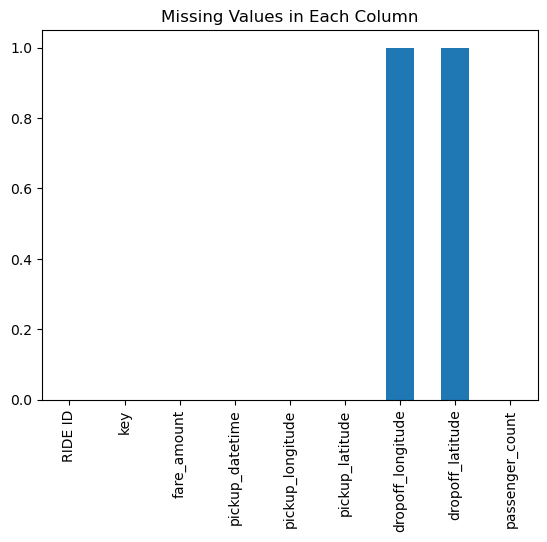

In [823]:
# Visualizing the count of null values for each column
df.isnull().sum().plot(kind='bar', title='Missing Values in Each Column')

- With a dataset of 200,000 entries, the presence of only one null value in 'dropoff_longitude' and 'dropoff_latitude' is negligible. Removing these single instances is unlikely to significantly impact the model's training or performance.

##### Dropping the null values

In [826]:
# Dropping rows with null (NaN) values from the DataFrame df
df.dropna(axis=0, inplace=True)

# Display the first few rows of the DataFrame df after removing null rows
df.head()

,RIDE ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


<Axes: title={'center': 'Missing Values After Dropping Rows'}>

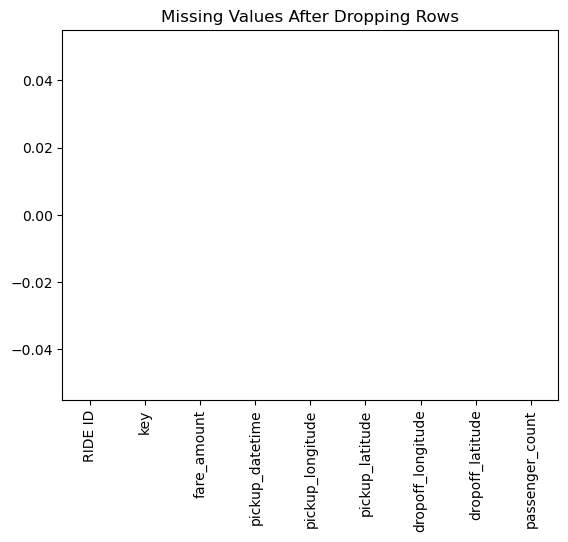

In [827]:
# Rechecking the null values in the DataFrame df after dropping rows
df.isnull().sum().plot(kind='bar', title='Missing Values After Dropping Rows')

# Feature Engineering: for Improved Model Performance

#### Converting 'key' and 'pickup_datetime' columns to datetime format

In [830]:
# Converting object-type date columns to datetime for easier analysis
df['key'] = pd.to_datetime(df['key'])
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df.dtypes[['key', 'pickup_datetime']]

key                     datetime64[ns]
pickup_datetime    datetime64[ns, UTC]
dtype: object

 #### Extracting time-based features from the 'pickup_datetime' column for detailed analysis

In [832]:
# Extract the year from 'pickup_datetime' and store it in 'pickup_year'
df['pickup_year'] = df['pickup_datetime'].dt.year

# Extract the month from 'pickup_datetime' and store it in 'pickup_month'
df['pickup_month'] = df['pickup_datetime'].dt.month

# Extract the day of the week (0=Monday, 6=Sunday) and store it in 'pickup_weekday'
df['pickup_weekday'] = df['pickup_datetime'].dt.dayofweek

# Extract the hour of the day (0-23) and store it in 'pickup_hour'
df['pickup_hour'] = df['pickup_datetime'].dt.hour

#### Function to calculate the great-circle distance between two points

In [834]:
import math
# given their longitude and latitude using the haversine formula
def haversine(lon1, lat1, lon2, lat2):
    # Convert latitude and longitude from degrees to radians
    lon1, lat1, lon2, lat2 = map(math.radians, [lon1, lat1, lon2, lat2])

    # Calculate the differences in coordinates
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the haversine formula
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.asin(math.sqrt(a))

    # Radius of Earth in kilometers (value from Wikipedia: https://en.wikipedia.org/wiki/Earth_radius)
    radius_earth = 6371

    # Calculate the distance
    distance = c * radius_earth
    return distance

#### Calculate the distance in kilometers for each ride using the haversine function

In [836]:
# Apply the haversine function row-wise and store distances in 'distance_km'
df['distance_km'] = df.apply(
    lambda row: haversine(
        row['pickup_longitude'], row['pickup_latitude'],
        row['dropoff_longitude'], row['dropoff_latitude']
    ),
    axis=1
)

#### Verifying the newly created 'distance_km' column

In [838]:
df

,RIDE ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,5,3,19,1.683323
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,7,4,20,2.457590
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,8,0,21,5.036377
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,6,4,8,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,8,3,17,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,10,6,10,0.112210
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,1,1.875050
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,6,0,0,12.850319
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,5,2,14,3.539715


#### Visualizing the distribution of Uber rides based on the pickup year (2009-2015)

Text(0.5, 1.0, 'Distribution of Uber Rides by Pickup Year (2009-2015)')

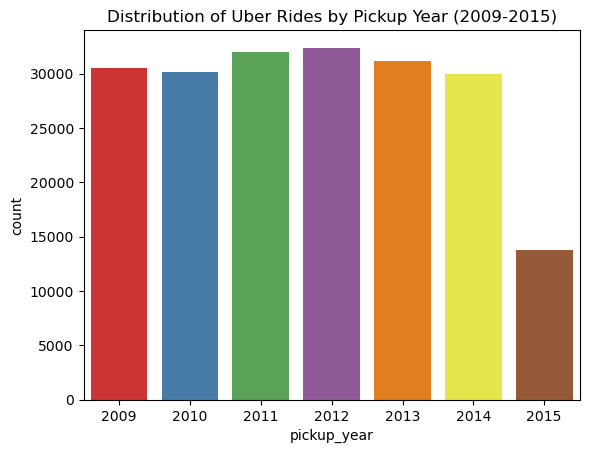

In [840]:
# A count plot will display the number of rides for each year in the 'pickup_year' column
# Using the 'Set1' color palette for attractive and distinct colors for the bars
sns.countplot(data=df, x='pickup_year', palette='Set1')
plt.title('Distribution of Uber Rides by Pickup Year (2009-2015)')

- The bar plot reveals that the highest number of Uber rides occurred in 2011, 2012, and 2013. On the other hand, there was a significant decline in ride numbers in 2015.

#### Exploring the distribution of Uber rides based on the month (January - December)

Text(0.5, 1.0, 'Distribution of Uber Rides by Month (January - December)')

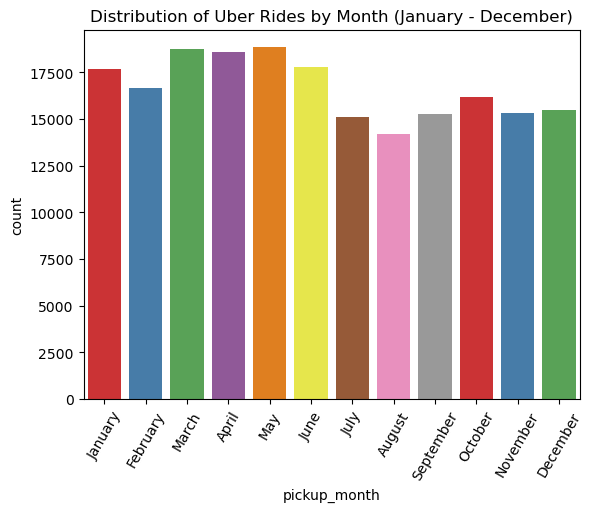

In [843]:
# Using the 'Set1' palette for vibrant, attractive colors for the bars
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax1 = sns.countplot(data=df, x='pickup_month', palette='Set1')

# Setting the x-axis labels to month names and rotating them for better visibility
ax1.set_xticklabels(months, rotation=60)

# Adding a title to the graph for context
plt.title('Distribution of Uber Rides by Month (January - December)')

- The bar plot indicates that Uber rides peak during March, April, and May. In contrast, the number of rides drops significantly during July through December compared to other months.

#### Grouping the 12 months into four seasons—Winter, Spring, Summer, and Autumn—to simplify the 'pickup_month' variable by reducing its levels and intervals.

In [846]:
# Mapping numeric values in 'pickup_month' to corresponding month names for better readability
df['pickup_month'] = df['pickup_month'].map({
    1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August',
    9: 'September', 10: 'October', 11: 'November', 12: 'December'
})

# Categorizing months into seasons (Winter, Spring, Summer, Autumn)
# Creating a helper function to assign a season to each month
def assign_season(pickup_month):
    if pickup_month in ['December', 'January', 'February']:
        return 'Winter'
    elif pickup_month in ['March', 'April', 'May']:
        return 'Spring'
    elif pickup_month in ['June', 'July', 'August']:
        return 'Summer'
    else:
        return 'Autumn'

# Applying the season categorization function to the 'pickup_month' column
df['pickup_month'] = df['pickup_month'].apply(assign_season)

#### Visualizing the distribution of Uber rides based on seasons

Text(0.5, 1.0, 'Seasonal Distribution of Uber Rides')

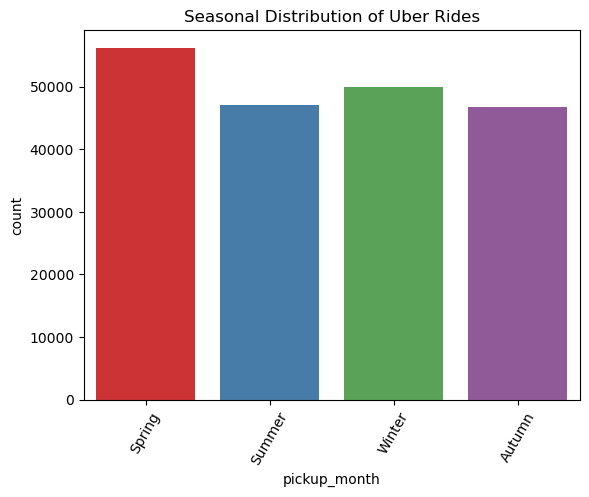

In [848]:
# Using the 'Set1' palette for distinct and visually appealing colors for the bars
ax2 = sns.countplot(data=df, x='pickup_month', palette='Set1')

# Rotating x-axis labels for better readability
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=60)

# Adding a meaningful title to the graph
plt.title('Seasonal Distribution of Uber Rides')

- The bar plot reveals that the Spring season stands out with a higher number of Uber rides compared to the other seasons.

#### Converting the categorical values of the 'pickup_month' column into numeric values

In [851]:
# This is done to enable correlation analysis and heatmap plotting
df['pickup_month'] = df['pickup_month'].map({
    'Winter': 1, 'Summer': 2, 'Spring': 3, 'Autumn': 4
})

# Ensuring the mapped values are of integer type for numerical operations
df['pickup_month'] = df['pickup_month'].astype(int)

#### Analyzing the distribution of Uber rides across weekdays (Monday - Sunday)

Text(0.5, 1.0, 'Distribution of Uber Rides Across Weekdays')

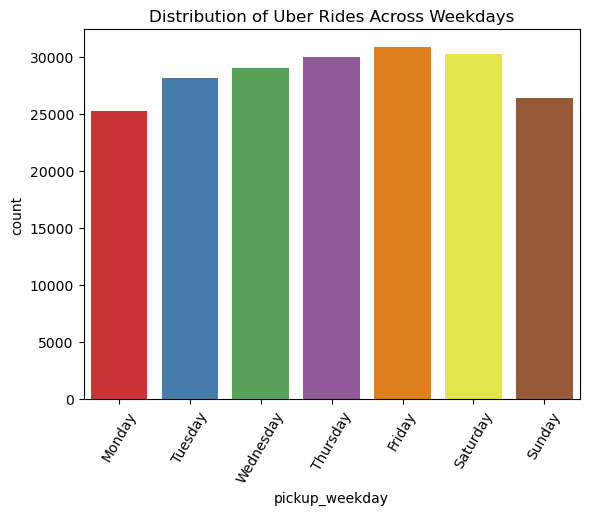

In [853]:
# Using the 'Set1' palette for vibrant and distinct bar colors
week_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ax3 = sns.countplot(data=df, x='pickup_weekday', palette='Set1')

# Setting custom labels for weekdays and rotating them for better readability
ax3.set_xticklabels(week_days, rotation=60)

# Adding an informative title to the graph
plt.title('Distribution of Uber Rides Across Weekdays')

- The bar plot highlights that Thursday, Friday, and Saturday witness the highest number of Uber rides, while Sunday, Monday, Tuesday, and Wednesday show relatively lower ride counts.

#### Analyzing the distribution of Uber rides across different hours of the day (from 0:00 AM to 23:59 PM)

Text(0.5, 1.0, 'Hourly Distribution of Uber Rides')

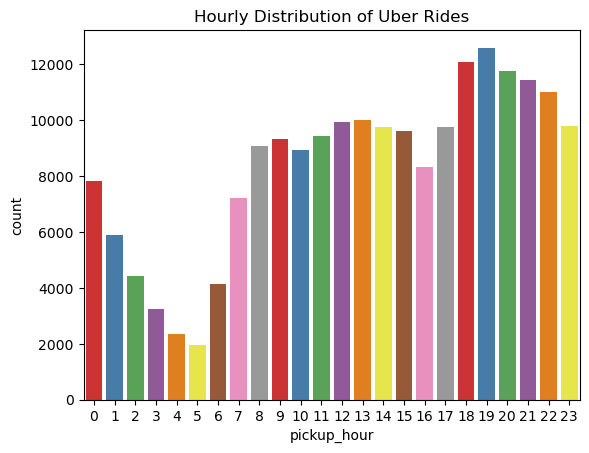

In [856]:
# Using the 'Set1' palette for distinct and vibrant bar colors
ax4 = sns.countplot(data=df, x='pickup_hour', palette='Set1')

# Adding an informative title to the graph
plt.title('Hourly Distribution of Uber Rides')

- The 'pickup_hour' bar plot reveals a distinct diurnal pattern in Uber ridership. Demand is lowest between midnight and 6 am, steadily increases from 7 am onwards, peaks between 7 pm and 10 pm, and then gradually declines after 11 pm.

#### Categorizing hours into specific time shifts using 3-hour intervals

In [859]:
# The function 'hour_day' assigns a label based on the given hour to represent different time periods
def hour_day(pickup_hour):
    if pickup_hour >= 0 and pickup_hour < 3:
        return 'Late_Night'  # Late-night hours (12:00 AM - 3:00 AM)
    elif pickup_hour >= 3 and pickup_hour < 6:
        return 'Early_Morning'  # Early morning (3:00 AM - 6:00 AM)
    elif pickup_hour >= 6 and pickup_hour < 9:
        return 'Morning_Start'  # Morning start (6:00 AM - 9:00 AM)
    elif pickup_hour >= 9 and pickup_hour < 12:
        return 'Rush_Morning'  # Morning rush (9:00 AM - 12:00 PM)
    elif pickup_hour >= 12 and pickup_hour < 15:
        return 'Afternoon_Peak'  # Noon time (12:00 PM - 3:00 PM)
    elif pickup_hour >= 15 and pickup_hour < 18:
        return 'Evening_Rise'  # Evening rise (3:00 PM - 6:00 PM)
    elif pickup_hour >= 18 and pickup_hour < 21:
        return 'Evening_Drive'  # Evening commute (6:00 PM - 9:00 PM)
    elif pickup_hour >= 21 and pickup_hour <= 23:
        return 'Night_Activity'  # Late-night activities (9:00 PM - 12:00 AM)

# Applying the 'hour_day' function to categorize the 'pickup_hour' into time shifts
df['pickup_hour'] = df['pickup_hour'].apply(lambda x: hour_day(x))

- By categorizing the 'pickup_hour' variable into 3-hour intervals, the initial 24 time categories have been reduced to 8. This simplified classification provides Uber drivers with a clearer understanding of the most favorable time periods during the day, helping them target specific hours that are likely to have more passenger demand.

#### Exploring the distribution of Uber rides based on 3-hour time intervals

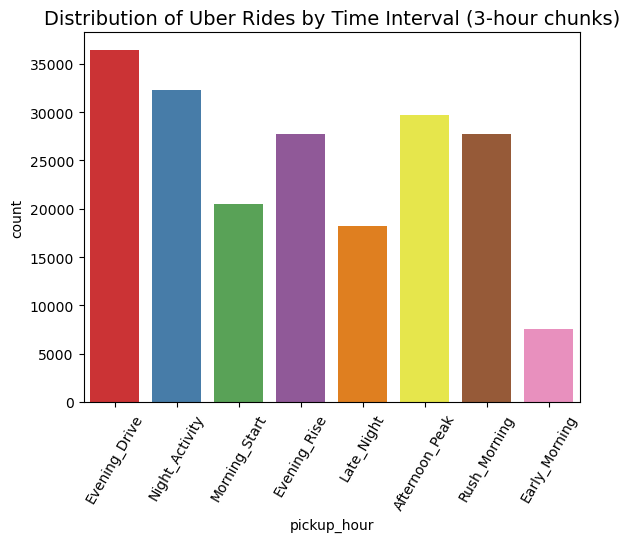

In [862]:
# Using a Set1 color palette for better visualization
sns.countplot(data=df, x='pickup_hour', palette='Set1') 
plt.title('Distribution of Uber Rides by Time Interval (3-hour chunks)', fontsize=14)  # Title of the graph
plt.xticks(rotation=60)  # Rotating the x-axis labels for better readability
plt.show()  # Display the plot

- The plot illustrates the distribution of Uber rides across different 3-hour time intervals, highlighting peak and low-demand periods. The Evening Drive (6 PM–9 PM) sees the highest ride count, followed by Night Activity (9 PM–12 AM), reflecting high demand for leisure and late commutes. Moderate activity is observed during Afternoon Peak (3 PM–6 PM) and Rush Morning (6 AM–9 AM), likely due to work and school-related travel. In contrast, Early Morning (3 AM–6 AM) records the lowest rides, indicating minimal travel demand during these hours.

In [864]:
# Mapping the categorical time shifts of 'pickup_hour' to numerical values for correlation heatmap plotting
df.loc[:, 'pickup_hour'] = df['pickup_hour'].map({
    'Late_Night': 0,        # 12:00 AM - 3:00 AM
    'Early_Morning': 1,     # 3:00 AM - 6:00 AM
    'Morning_Start': 2,     # 6:00 AM - 9:00 AM
    'Rush_Morning': 3,      # 9:00 AM - 12:00 PM
    'Afternoon_Peak': 4,    # 12:00 PM - 3:00 PM
    'Evening_Rise': 5,      # 3:00 PM - 6:00 PM
    'Evening_Drive': 6,     # 6:00 PM - 9:00 PM
    'Night_Activity': 7     # 9:00 PM - 12:00 AM
})

# Converting the 'pickup_hour' column to integer type for numerical operations
df['pickup_hour'] = df['pickup_hour'].astype(int)

# Handling Outliers

- Handling outliers is a critical step in data preprocessing, as it directly impacts the accuracy and reliability of the predictive model. Proper treatment—whether through labeling, capping, or removal—ensures that the model performs well and generates robust predictions during the model-building phase.

#### Identifying Unusual Low and High Fares in the 'fare_amount' Column

In [868]:
# Checking the minimum value in the 'fare_amount' column to identify the lowest fare recorded
min_fare = df['fare_amount'].min()
print(f"Minimum fare amount: {min_fare}")

# Checking the maximum value in the 'fare_amount' column to identify the highest fare recorded
max_fare = df['fare_amount'].max()
print(f"Maximum fare amount: {max_fare}")

Minimum fare amount: -52.0
Maximum fare amount: 499.0


#### Visualizing the relationship between 'passenger_count' and 'fare_amount'

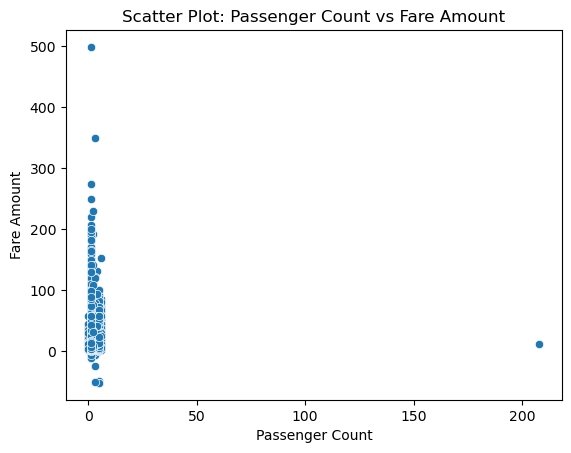

In [870]:
# Plotting a scatter plot to visualize the relationship between 'passenger_count' and 'fare_amount'
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')

# Adding labels for better clarity
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')

# Adding a title to the plot
plt.title('Scatter Plot: Passenger Count vs Fare Amount')

# Display the plot
plt.show()

- The scatter plot reveals outliers with unrealistic passenger counts (e.g., >6) and unusually high fares (e.g., >$300). These should be capped or removed to ensure data accuracy and improve model reliability.

In [872]:
# Identifying rows with 'passenger_count' values exceeding 200
outlier_rows = df.query('passenger_count > 200')
outlier_rows

,RIDE ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
113038,35893772,2010-12-28 08:20:00.000000100,11.7,2010-12-28 08:20:00+00:00,-73.937795,40.758498,-73.937835,40.758415,208,2010,1,1,2,0.009825


#### Filtering Rows Based on 'passenger_count' Less Than 200

In [874]:
# Filter rows where the 'passenger_count' is less than 200
df = df[df['passenger_count'] < 200]

# Display the filtered DataFrame
df

,RIDE ID,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,24238194,2015-05-07 19:52:06.000000300,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,3,6,1.683323
1,27835199,2009-07-17 20:04:56.000000200,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2009,2,4,6,2.457590
2,44984355,2009-08-24 21:45:00.000000610,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,2009,2,0,7,5.036377
3,25894730,2009-06-26 08:22:21.000000100,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,4,2,1.661683
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,2014,2,3,5,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.000000530,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,2012,4,6,3,0.112210
199996,16382965,2014-03-14 01:09:00.000000800,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,0,1.875050
199997,27804658,2009-06-29 00:42:00.000000780,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,2009,2,0,0,12.850319
199998,20259894,2015-05-20 14:56:25.000000400,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695415,1,2015,3,2,4,3.539715


#### Scatter Plot of 'passenger_count' vs 'fare_amount

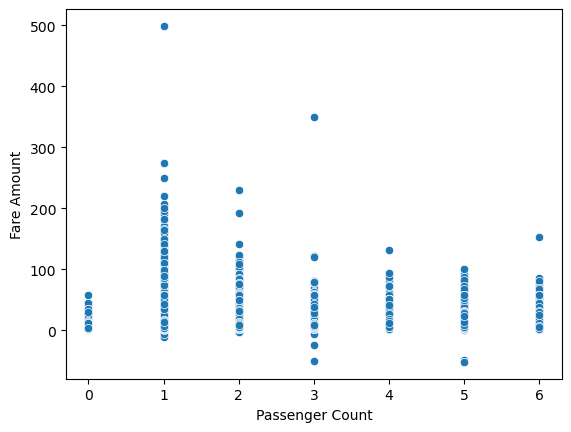

In [876]:
# Plotting a scatter plot to visualize the relationship between 'passenger_count' and 'fare_amount'
sns.scatterplot(data=df, x='passenger_count', y='fare_amount')

# Adding labels for better clarity
plt.xlabel('Passenger Count')
plt.ylabel('Fare Amount')

# Display the plot
plt.show()

### Dropping Unnecessary Variables from the DataFrame df

In [878]:
# Dropping unnecessary columns 'pickup_datetime', 'RIDE ID', and 'key' from the DataFrame
df = df.drop(['pickup_datetime', 'RIDE ID', 'key'], axis=1)

# Display the updated DataFrame without the dropped columns
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015,3,3,6,1.683323
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009,2,4,6,2.457590
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009,2,0,7,5.036377
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009,2,4,2,1.661683
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014,2,3,5,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,2012,4,6,3,0.112210
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,2014,3,4,0,1.875050
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,2009,2,0,0,12.850319
199998,14.5,-73.997124,40.725452,-73.983215,40.695415,1,2015,3,2,4,3.539715


#### Box Plot for Identifying Outliers in the Data

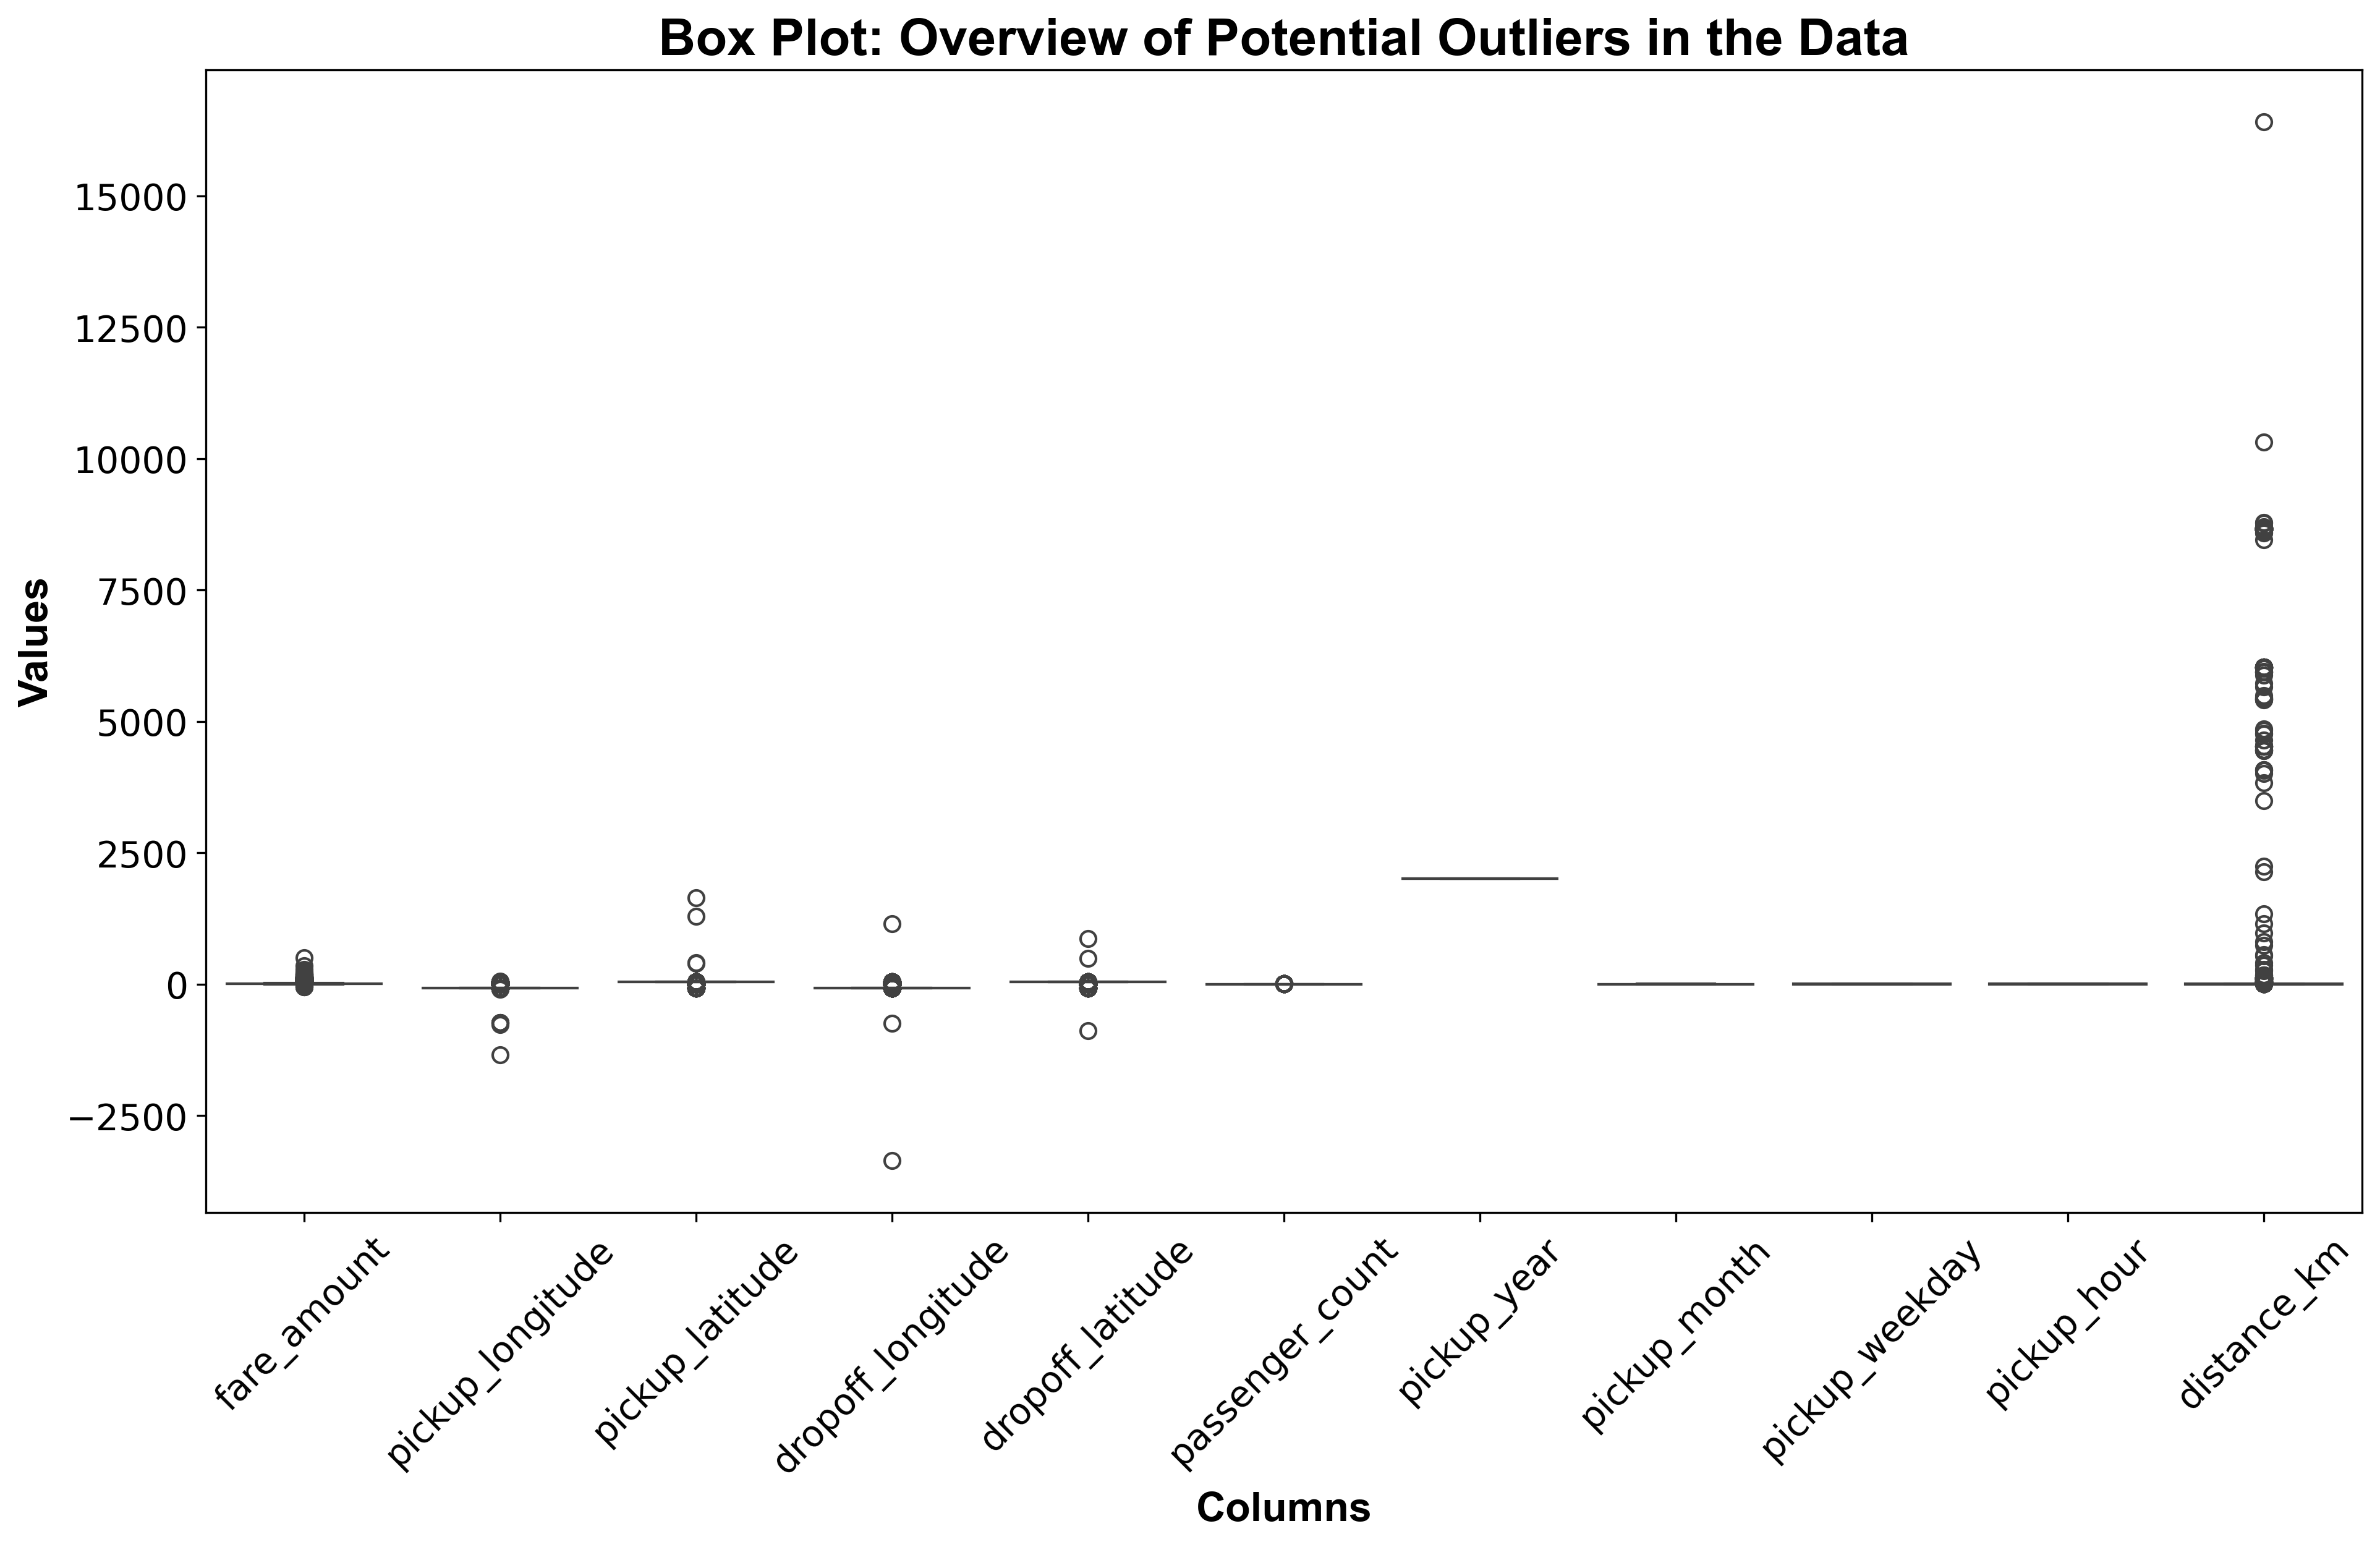

In [880]:
# Set the figure size and DPI for high resolution
plt.figure(figsize=(15, 8), dpi=300)

# Create the box plot
sns.boxplot(data=df)

# Adding a title with improved font size and style
plt.title('Box Plot: Overview of Potential Outliers in the Data', fontsize=20, fontweight='bold', family='Arial')

# Increase the font size for axis labels
plt.xlabel('Columns', fontsize=16, fontweight='bold', family='Arial')
plt.ylabel('Values', fontsize=16, fontweight='bold', family='Arial')

# Adjusting the font size for tick labels for better readability
plt.xticks(fontsize=14, rotation=45)
plt.yticks(fontsize=14)

# Display the plot
plt.show()


##### Overall Observations:
- The box plot reveals that the fare_amount and distance_km variables have the most significant outliers.
- The time-related variables appear to have a relatively uniform distribution.
- The pickup and dropoff locations show a limited range of values with a few outliers.

In [882]:
# Display a concise summary of the DataFrame to identify column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 199998 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199998 non-null  float64
 1   pickup_longitude   199998 non-null  float64
 2   pickup_latitude    199998 non-null  float64
 3   dropoff_longitude  199998 non-null  float64
 4   dropoff_latitude   199998 non-null  float64
 5   passenger_count    199998 non-null  int64  
 6   pickup_year        199998 non-null  int32  
 7   pickup_month       199998 non-null  int32  
 8   pickup_weekday     199998 non-null  int32  
 9   pickup_hour        199998 non-null  int32  
 10  distance_km        199998 non-null  float64
dtypes: float64(6), int32(4), int64(1)
memory usage: 15.3 MB


#### Select numeric columns for box plot analysis to check for outliers

In [884]:
# Extract column names of all numeric data types from the DataFrame df
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

# 'numeric_columns' now contains a list of column names with numeric data types
print("Numeric Columns:", numeric_columns)

Numeric Columns: ['fare_amount', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'pickup_year', 'pickup_month', 'pickup_weekday', 'pickup_hour', 'distance_km']


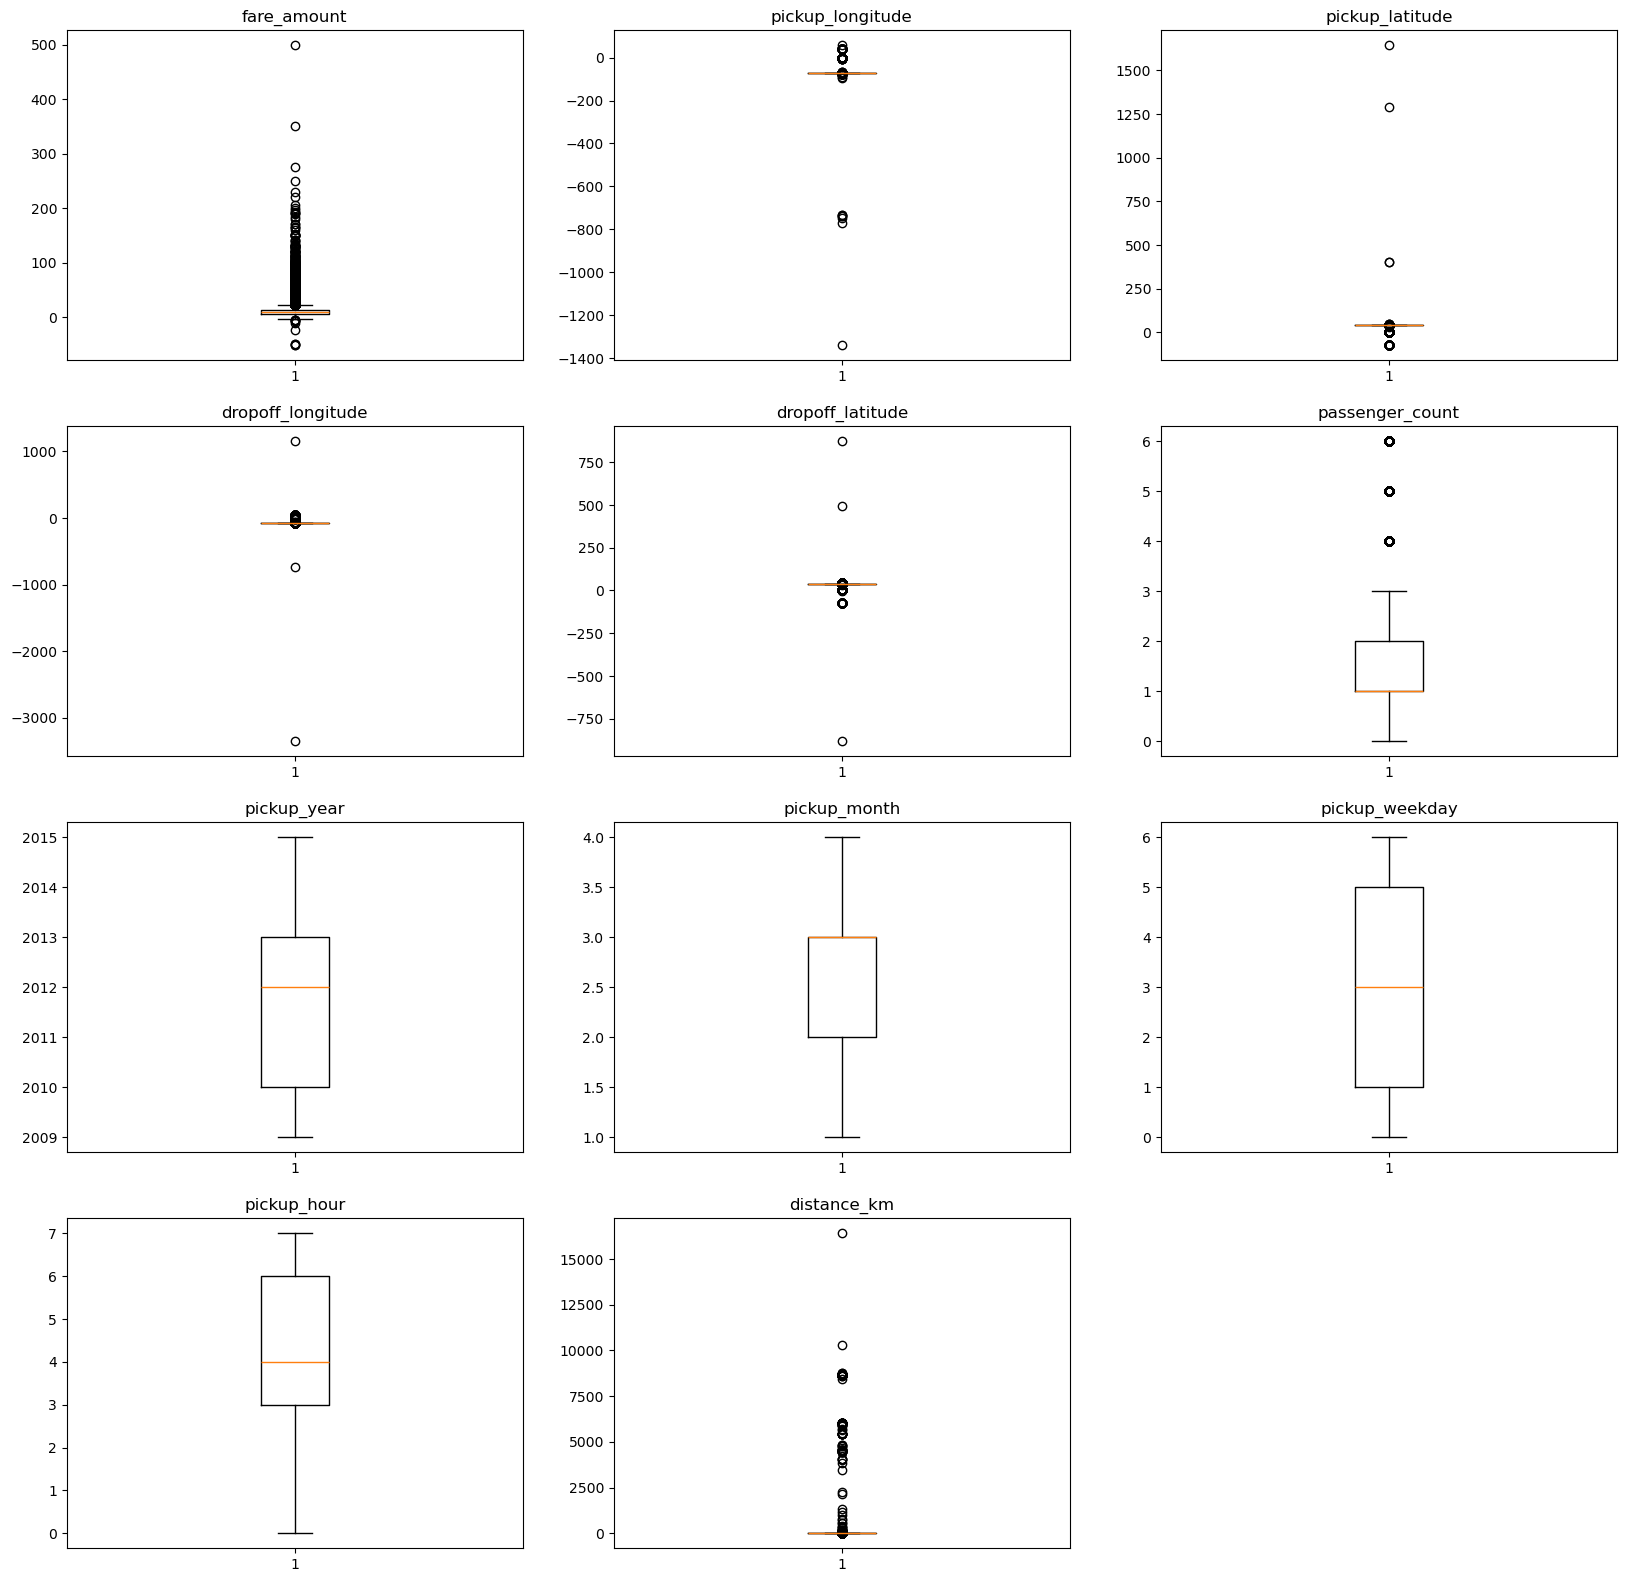

In [885]:
# Set the figure size for better visualization
plt.figure(figsize=(20, 30))

# Loop through each numeric column to create individual boxplots
for i, variable in enumerate(numeric_columns):
    # Create a subplot for each numeric column
    plt.subplot(6, 3, i + 1)  # Adjust the grid size (6 rows x 3 columns)
    
    # Plot a boxplot for the current column
    plt.boxplot(df[variable], whis=1.5)
    
    # Add the column name as the title for the subplot
    plt.title(variable)

# Display all the boxplots
plt.show()

### Introduction to data analysis: Box Plot
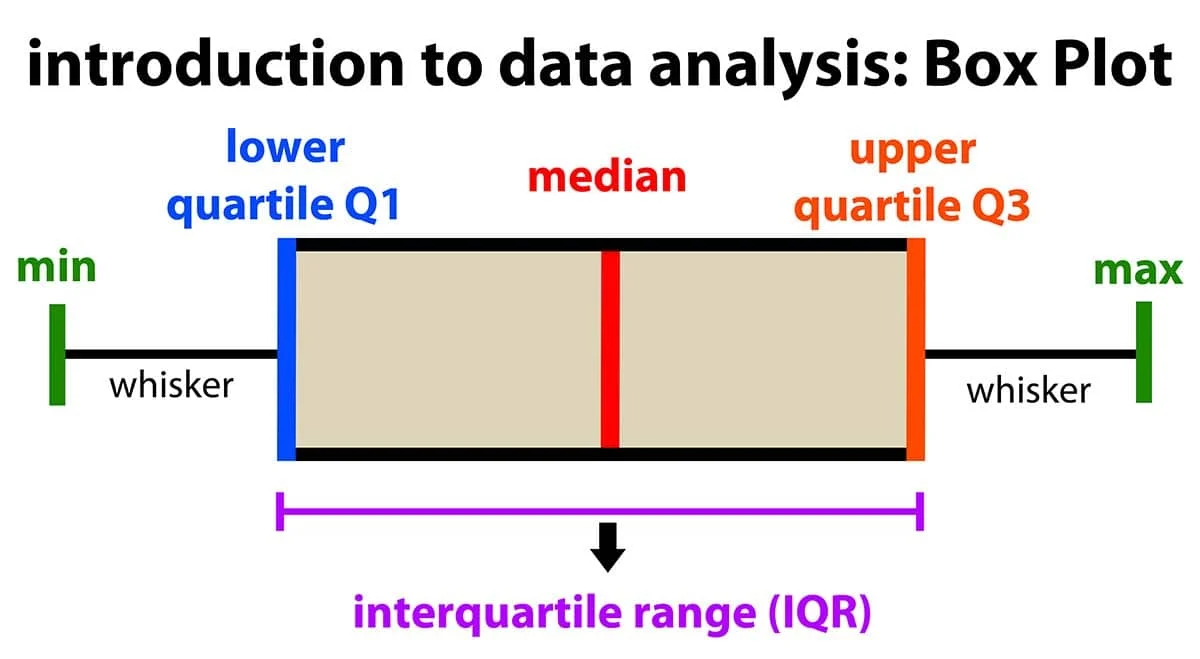
- Interquartile Range (IQR) and Its Role in Outlier Detection
- The Interquartile Range (IQR) measures the spread of the middle 50% of a dataset. It is calculated as:
- IQR = Q3 - Q1
- Where:
- Q1: 25th percentile (lower quartile) — 25% of data falls below this value.
- Q3: 75th percentile (upper quartile) — 75% of data falls below this value.

- Why Use IQR?
- The IQR is a reliable method for identifying outliers. Outliers are data points significantly distant from the rest, which can skew analyses.
- Using IQR, we establish thresholds to detect and handle outliers.

- Outlier Boundaries:
- Lower Bound: Q1 - 1.5 * IQR
- Upper Bound: Q3 + 1.5 * IQR
- Data points beyond these bounds are considered outliers and can be clipped or removed to maintain data integrity.
- Adding an external image for better understanding                                                                   

#### Handling Outliers in Numerical Columns using IQR Method

In [888]:
# Function to remove outliers for a specific column using the Interquartile Range (IQR)
def remove_outlier(df1, col):
    # Calculating Q1, Q3, and IQR
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    
    # Calculating the lower and upper whiskers
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    
    # Clipping the column values within the whisker range
    df1.loc[:, col] = np.clip(df1[col], lower_whisker, upper_whisker)
    return df1

# Function to treat outliers in all specified numerical columns
def treat_outliers_all(df1, col_list):
    # Iterating through the list of columns to treat their outliers
    for c in col_list:
        df1 = remove_outlier(df1, c)
    return df1

#### Applying Outlier Treatment to the Entire DataFrame df

In [890]:
# Applying the IQR-based outlier treatment to all specified numerical columns
df = treat_outliers_all(df, numeric_columns)

#### Visualizing Outliers in Numerical Columns After Treatment

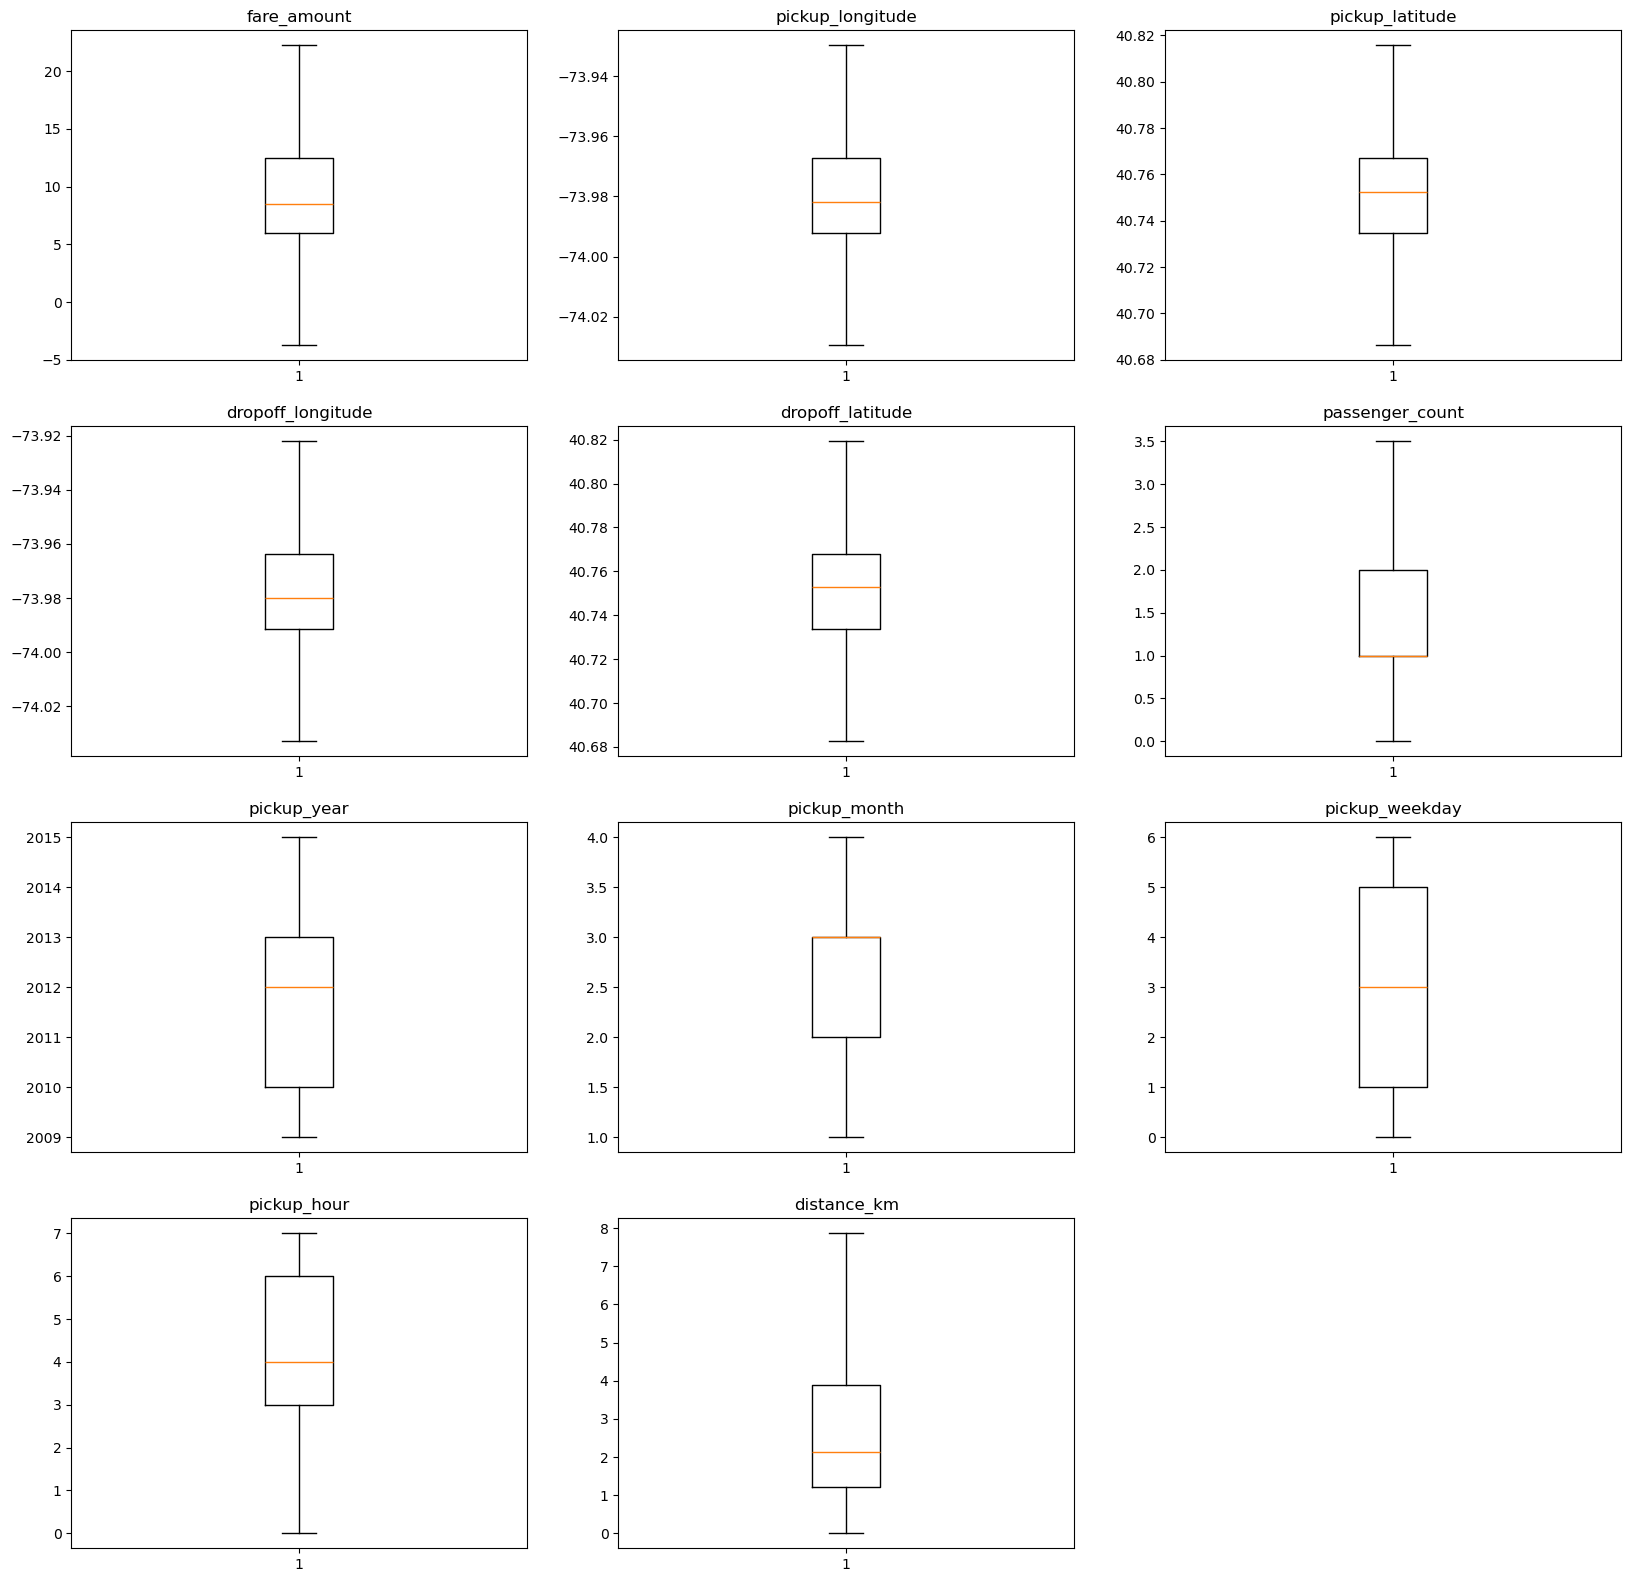

In [892]:
# Plotting boxplots for all numerical columns to verify the effectiveness of outlier treatment
plt.figure(figsize=(20, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(6, 3, i + 1)  # Arranging plots in a grid layout
    plt.boxplot(df[variable], whis=1.5)  # Boxplot with IQR whiskers
    plt.title(variable)  # Setting title for each plot with column name

plt.show()  # Displaying the plots

- The box plots provide a valuable visual summary of the data distribution for each variable

# Advanced Feature Engineering: Enhancing the Target Variable 'Fare Amount'

#### Visualizing the Distribution of the Target Variable: 'Fare Amount'

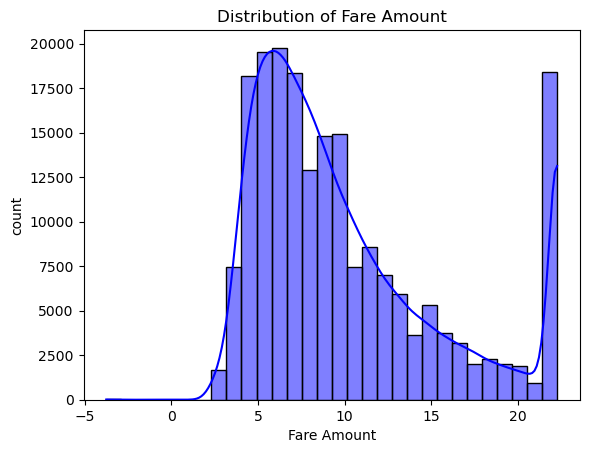

In [896]:
# Plotting the distribution of the target variable 'fare_amount'
sns.histplot(df['fare_amount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('count')
plt.show()

- Upon reviewing the histogram, it is evident that some fare amounts fall within the range of 0 to 2.5. To refine the dataset, we will filter out these values and retain only those fare amounts that exceed 2.5.

In [898]:
# Data Filtering: Keep Observations with fare_amount > 2.5
df = df.query('fare_amount > 2.5')

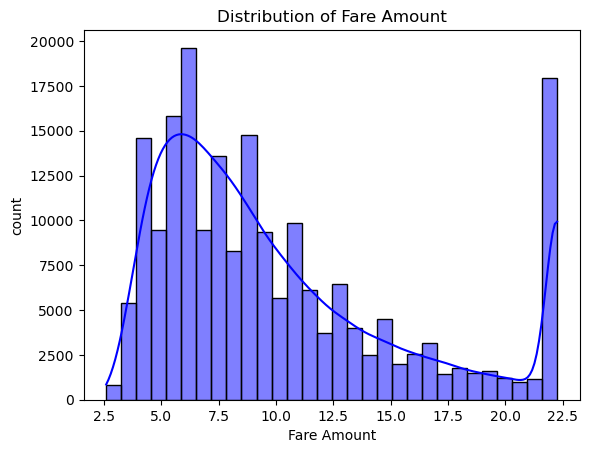

In [899]:
sns.histplot(df['fare_amount'], kde=True, bins=30, color='blue')
plt.title('Distribution of Fare Amount')
plt.xlabel('Fare Amount')
plt.ylabel('count')
plt.show()

In [900]:
df.shape

(199148, 11)

#### Plotting the Distribution of the Variable 'distance_km'

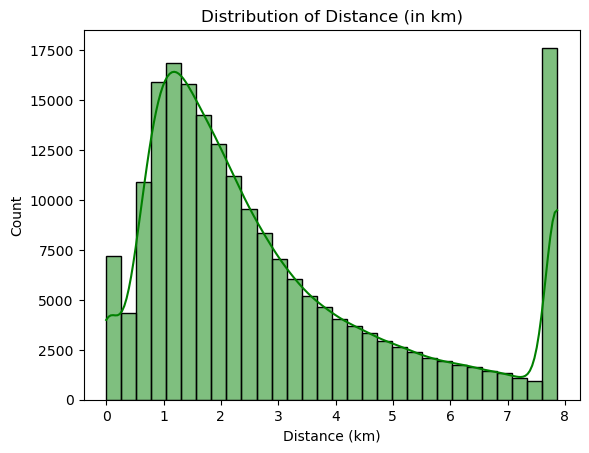

In [902]:
# Plotting the histogram for 'distance_km'
sns.histplot(df['distance_km'], kde=True, bins=30, color='green')

# Adding title and labels
plt.title('Distribution of Distance (in km)')
plt.xlabel('Distance (km)')
plt.ylabel('Count')

# Displaying the plot
plt.show()

- To address the issue of zero values in the distance_km variable, we can filter out those records where the distance is zero. Since zero values may skew the correlation analysis and model performance, we'll focus on selecting only those rows where the distance_km is greater than zero.

In [904]:
df.shape

(199148, 11)

In [905]:
# Data Cleaning: Remove Records with Zero Distance
df = df[df['distance_km'] > 0.0]

In [906]:
df.shape

(193718, 11)

- After filtering out rows where distance_km is equal to or less than zero, the total row count reduced from 199,148 to 193,718. This decrease is minimal and does not significantly impact the dataset, as there are still sufficient clean records available for robust model development and analysis.

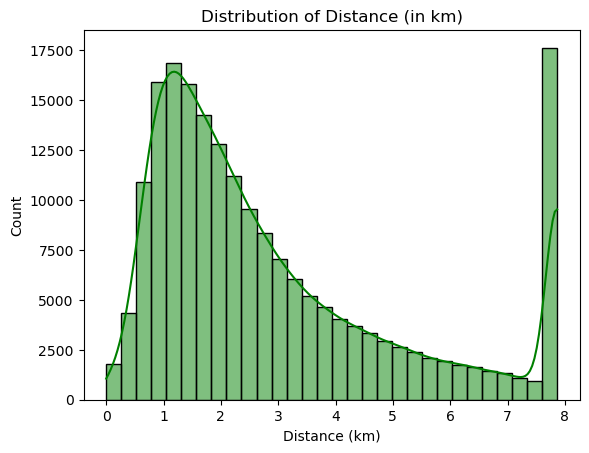

In [908]:
# Plotting the histogram for 'distance_km'
sns.histplot(df['distance_km'], kde=True, bins=30, color='green')

# Adding title and labels
plt.title('Distribution of Distance (in km)')
plt.xlabel('Distance (km)')
plt.ylabel('Count')

# Displaying the plot
plt.show()

- The majority of distance_km values fall within the range of 7.5 to 8. Removing these values could result in a substantial loss of data, which may negatively influence the correlation matrix and the performance of the model. Therefore, it is important to retain these records to preserve the integrity of the dataset for analysis and modeling.

In [910]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,3,6,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,2,4,6,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,2,0,7,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,2,4,2,1.661683
4,16.00,-73.929788,40.744085,-73.973082,40.761247,3.5,2014,2,3,5,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,4,6,3,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,4,0,1.875050
199997,22.25,-73.986017,40.756487,-73.922037,40.692588,2.0,2009,2,0,0,7.865133
199998,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,3,2,4,3.539715


#### Resetting the Index After Removing Outliers

In [912]:
# Reset the index of the DataFrame to ensure it is consecutive after filtering
df = df.reset_index(drop=True)

# Explanation:
# The 'drop=True' argument prevents the old index from being added as a new column.
# This step ensures the DataFrame has a clean, consecutive index for further analysis.

In [913]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,2015,3,3,6,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,2009,2,4,6,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,2009,2,0,7,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,2009,2,4,2,1.661683
4,16.00,-73.929788,40.744085,-73.973082,40.761247,3.5,2014,2,3,5,4.475450
...,...,...,...,...,...,...,...,...,...,...,...
193713,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,2012,4,6,3,0.112210
193714,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,2014,3,4,0,1.875050
193715,22.25,-73.986017,40.756487,-73.922037,40.692588,2.0,2009,2,0,0,7.865133
193716,14.50,-73.997124,40.725452,-73.983215,40.695415,1.0,2015,3,2,4,3.539715


# Correlation Analysis

#### Analyzing Correlation of 'fare_amount' with Other Features

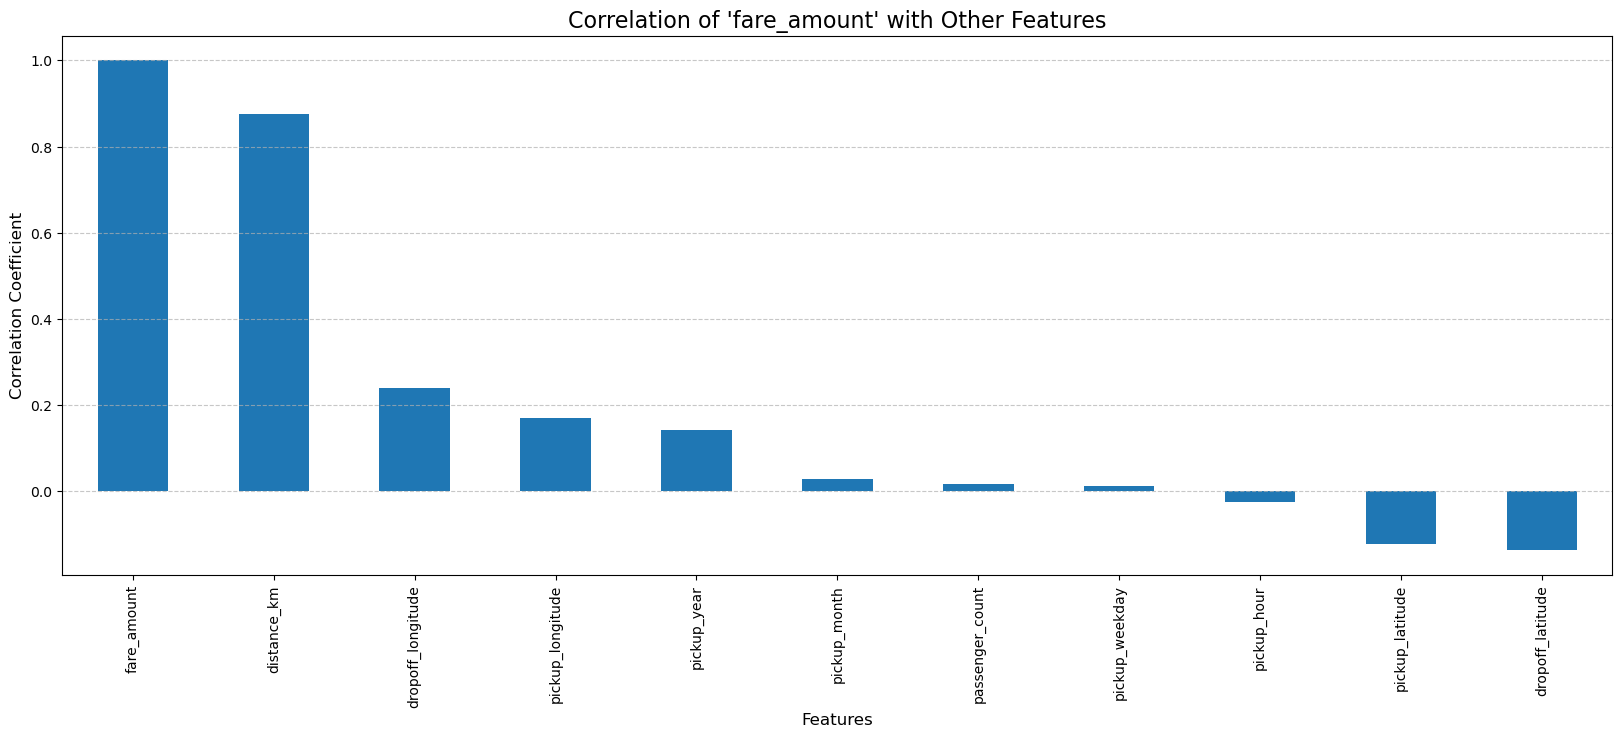

In [916]:
# Visualizing correlation using a bar plot
plt.figure(figsize=(20, 7))
df.corr()['fare_amount'].sort_values(ascending=False).plot(kind='bar')
plt.title("Correlation of 'fare_amount' with Other Features", fontsize=16)
plt.ylabel('Correlation Coefficient', fontsize=12)
plt.xlabel('Features', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

- Observing correlation: 'fare_amount' shows a strong correlation with 'distance_km' 
- and weaker correlations with features like 'pickup_year', 'pickup_month', 'pickup_hour', and 'passenger_count'.
- High correlation is indicated by values closer to -1 or 1.

#### Visualizing the Correlation Matrix of Dataset Features

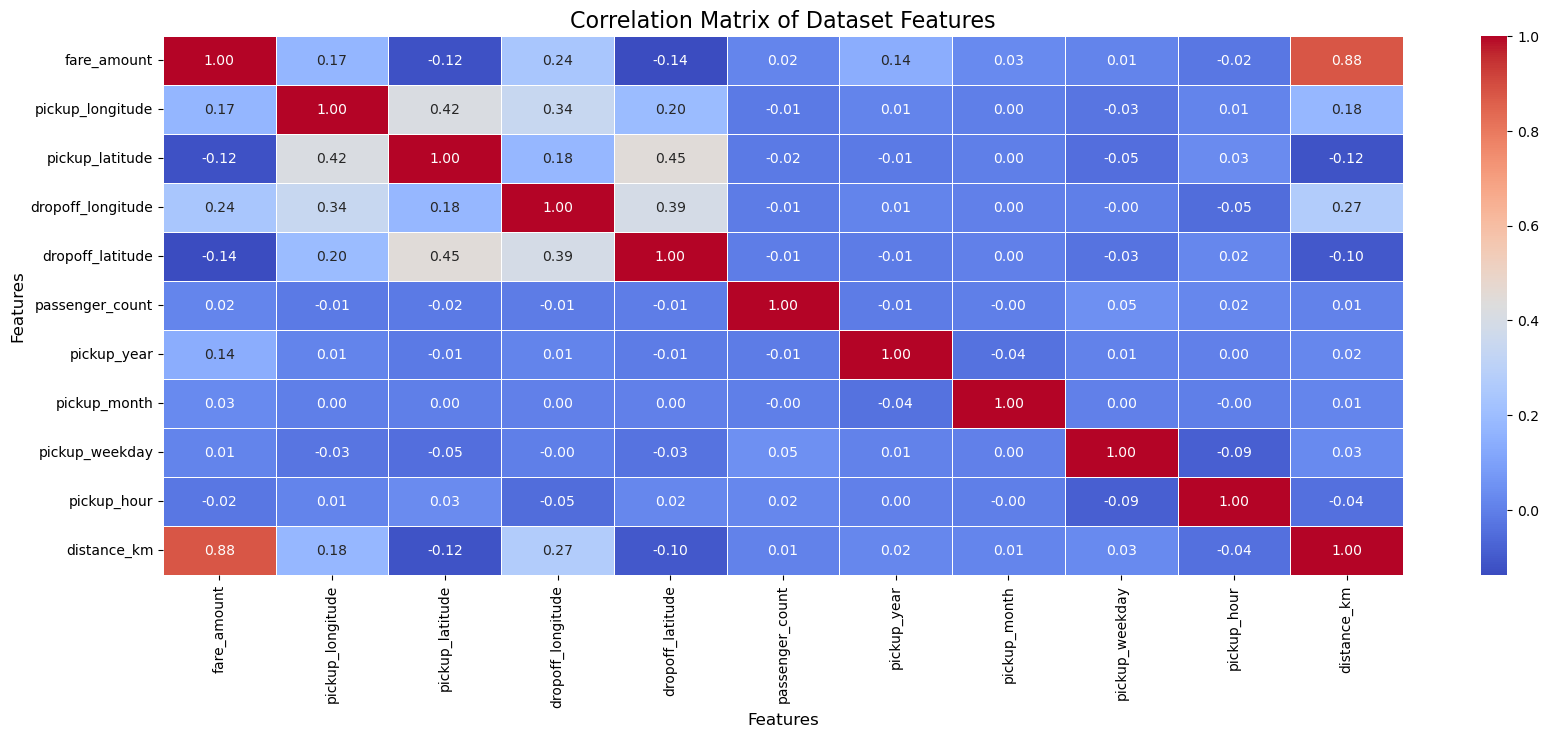

In [919]:
# Creating a heatmap to display the correlation matrix for all columns in the dataset 'df'.
# This helps identify the relationships between features, where high positive or negative values 
# indicate stronger correlations.
plt.figure(figsize=(20, 7))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Dataset Features", fontsize=16)
plt.xlabel("Features", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.show()

- The target variable 'fare_amount' exhibits a strong positive correlation with 'distance_km'. On the other hand, it has a weaker positive correlation with features such as 'pickup_year', 'pickup_month', 'pickup_hour', and 'passenger_count'. From the bar plot, values near -1 or 1 indicate a strong linear relationship between the corresponding variables.

In [921]:
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
count,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000
mean,10.122414,-73.979313,40.751396,-73.977294,40.751432,1.515218,2011.747834,2.499685,3.048973,4.165896,2.943069
std,5.423635,0.019467,0.024254,0.021733,0.027312,0.877005,1.859639,1.103430,1.946592,2.152835,2.197959
min,2.900000,-74.029431,40.686251,-74.033029,40.682556,0.000000,2009.000000,1.000000,0.000000,0.000000,0.000084
25%,6.000000,-73.992274,40.736365,-73.991592,40.735252,1.000000,2010.000000,2.000000,1.000000,3.000000,1.287981
50%,8.500000,-73.982118,40.753263,-73.980545,40.753723,1.000000,2012.000000,3.000000,3.000000,4.000000,2.189227
75%,12.500000,-73.968417,40.767527,-73.965455,40.768328,2.000000,2013.000000,3.000000,5.000000,6.000000,3.966106
max,22.250000,-73.929788,40.815702,-73.922037,40.819269,3.500000,2015.000000,4.000000,6.000000,7.000000,7.865133


In [922]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  int32  
 7   pickup_month       193718 non-null  int32  
 8   pickup_weekday     193718 non-null  int32  
 9   pickup_hour        193718 non-null  int32  
 10  distance_km        193718 non-null  float64
dtypes: float64(7), int32(4)
memory usage: 13.3 MB


- Upon reviewing the dataset one last time, it is observed that all the columns have been successfully converted to numerical data types.

# Encoding Categorical Variables:

- Transforming numerical columns such as 'distance_km,' 'pickup_year,' 'pickup_month,' 'pickup_weekday,' and 'pickup_hour' into categorical variables. This step prepares these columns for dummy variable encoding, enabling their use in model development.

#### Transforming the pickup_year Feature into Categorical Labels

In [927]:
# Converting the numerical values in the 'pickup_year' column into labeled categories for better interpretation
df.loc[:, 'pickup_year'] = df['pickup_year'].map({
    2009: 'Pickup_Year_2009',
    2010: 'Pickup_Year_2010',
    2011: 'Pickup_Year_2011',
    2012: 'Pickup_Year_2012',
    2013: 'Pickup_Year_2013',
    2014: 'Pickup_Year_2014',
    2015: 'Pickup_Year_2015'
})

#### Transforming the pickup_month Feature into Categorical Labels

In [929]:
# Mapping numerical values in the 'pickup_month' column to seasonal categories for better understanding
df.loc[:, 'pickup_month'] = df['pickup_month'].map({
    1: 'Pickup_Month_Winter',
    2: 'Pickup_Month_Summer',
    3: 'Pickup_Month_Spring',
    4: 'Pickup_Month_Autumn'
})

#### Transforming the pickup_weekday Feature into Categorical Labels

In [931]:
# Mapping numerical values in the 'pickup_weekday' column to corresponding day names for clarity
df.loc[:, 'pickup_weekday'] = df['pickup_weekday'].map({
    0: 'Pickup_Day_Monday',
    1: 'Pickup_Day_Tuesday',
    2: 'Pickup_Day_Wednesday',
    3: 'Pickup_Day_Thursday',
    4: 'Pickup_Day_Friday',
    5: 'Pickup_Day_Saturday',
    6: 'Pickup_Day_Sunday'
})

#### Transforming the pickup_hour Feature into Categorical Labels

In [933]:
# Using the 'map' function to assign descriptive labels based on the 'pickup_hour' values
df.loc[:, 'pickup_hour'] = df['pickup_hour'].map({
    0: 'Late_Night',          # 12:00 AM - 3:00 AM
    1: 'Early_Morning',       # 3:00 AM - 6:00 AM
    2: 'Morning_Start',       # 6:00 AM - 9:00 AM
    3: 'Rush_Morning',        # 9:00 AM - 12:00 PM
    4: 'Afternoon_Peak',      # 12:00 PM - 3:00 PM
    5: 'Evening_Rise',        # 3:00 PM - 6:00 PM
    6: 'Evening_Drive',       # 6:00 PM - 9:00 PM
    7: 'Night_Activity'       # 9:00 PM - 12:00 AM
})

#### Transforming the distance_km Feature into Categorical Labels

In [935]:
# Defining a function to categorize distance into labels based on given ranges
def categorize_distance(distance_km):
    if distance_km >= 0 and distance_km <= 2:
        return 'Very_Short_Distance'  # Distance between 0 and 2 km
    elif distance_km > 2 and distance_km <= 4:
        return 'Short_Distance'  # Distance between 2 and 4 km
    elif distance_km > 4 and distance_km <= 6:
        return 'Moderate_Distance'  # Distance between 4 and 6 km
    else:
        return 'Long_Distance'  # Distance greater than 6 km

# Applying the function to categorize 'distance_km' and storing the results in the same column
df.loc[:, 'distance_km'] = df['distance_km'].apply(lambda x: categorize_distance(x))

#### Verifying the Data Type of Variables After Categorization:

In [937]:
# Using df.info() to check the data types of all columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193718 entries, 0 to 193717
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        193718 non-null  float64
 1   pickup_longitude   193718 non-null  float64
 2   pickup_latitude    193718 non-null  float64
 3   dropoff_longitude  193718 non-null  float64
 4   dropoff_latitude   193718 non-null  float64
 5   passenger_count    193718 non-null  float64
 6   pickup_year        193718 non-null  object 
 7   pickup_month       193718 non-null  object 
 8   pickup_weekday     193718 non-null  object 
 9   pickup_hour        193718 non-null  object 
 10  distance_km        193718 non-null  object 
dtypes: float64(6), object(5)
memory usage: 16.3+ MB


#### Summary Statistics of the Dataset:

In [939]:
# Displaying summary statistics for all numeric columns in the dataset
df.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000,193718.000000
mean,10.122414,-73.979313,40.751396,-73.977294,40.751432,1.515218
std,5.423635,0.019467,0.024254,0.021733,0.027312,0.877005
min,2.900000,-74.029431,40.686251,-74.033029,40.682556,0.000000
25%,6.000000,-73.992274,40.736365,-73.991592,40.735252,1.000000
50%,8.500000,-73.982118,40.753263,-73.980545,40.753723,1.000000
75%,12.500000,-73.968417,40.767527,-73.965455,40.768328,2.000000
max,22.250000,-73.929788,40.815702,-73.922037,40.819269,3.500000


#### Converting Categorical Variables into Dummy Variables

- Machine learning models work with numerical data, so categorical variables must be encoded.Dummy variables transform each category into a binary column, represented by 1 and 0.

#### Encoding 'pickup_year' into Dummy Variables

In [943]:
# Creating dummy variables for the 'pickup_year' column
pickup_year_dummy = pd.get_dummies(df['pickup_year'], drop_first=True)

# Converting the dummy variables to integer type for consistency
pickup_year_dummy = pickup_year_dummy.astype(int)

# Displaying the first few rows of the dummy variable DataFrame
pickup_year_dummy.head()

,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015
0,0,0,0,0,0,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,1,0


#### Encoding 'pickup_month' into Dummy Variables

In [945]:
# Creating dummy variables for the 'pickup_month' column
pickup_month_dummy = pd.get_dummies(df['pickup_month'], drop_first=True)

# Converting the dummy variables to integer type for consistency and clarity
pickup_month_dummy = pickup_month_dummy.astype(int)

# Displaying the first few rows of the dummy variable DataFrame
pickup_month_dummy.head()

,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter
0,1,0,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0


#### Encoding 'pickup_weekday' into Dummy Variables

In [947]:
# Creating dummy variables for the 'pickup_weekday' column
pickup_weekday_dummy = pd.get_dummies(df['pickup_weekday'], drop_first=True)

# Converting the dummy variables to integer type for uniformity
pickup_weekday_dummy = pickup_weekday_dummy.astype(int)

# Displaying the first few rows of the dummy variable DataFrame
pickup_weekday_dummy.head()

,Pickup_Day_Monday,Pickup_Day_Saturday,Pickup_Day_Sunday,Pickup_Day_Thursday,Pickup_Day_Tuesday,Pickup_Day_Wednesday
0,0,0,0,1,0,0
1,0,0,0,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,1,0,0


#### Encoding 'pickup_hour' into Dummy Variables

In [949]:
# Creating dummy variables for the 'pickup_hour' column
pickup_hour_dummy = pd.get_dummies(df['pickup_hour'], drop_first=True)

# Converting the dummy variables to integer type for uniformity
pickup_hour_dummy = pickup_hour_dummy.astype(int)

# Displaying the first few rows of the dummy variable DataFrame
pickup_hour_dummy.head()

,Early_Morning,Evening_Drive,Evening_Rise,Late_Night,Morning_Start,Night_Activity,Rush_Morning
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0
4,0,0,1,0,0,0,0


#### Encoding 'distance_km' into Dummy Variables

In [951]:
# Creating dummy variables for the 'distance_km' column
distance_km_dummy = pd.get_dummies(df['distance_km'], drop_first=True)

# Converting the dummy variables to integer type for uniformity
distance_km_dummy = distance_km_dummy.astype(int)

# Displaying the first few rows of the dummy variable DataFrame
distance_km_dummy.head()

,Moderate_Distance,Short_Distance,Very_Short_Distance
0,0,0,1
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0


In [952]:
# Ensures that all categorical variables have been properly transformed into dummy variables.
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_year,pickup_month,pickup_weekday,pickup_hour,distance_km
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1.0,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Day_Thursday,Evening_Drive,Very_Short_Distance
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Friday,Evening_Drive,Short_Distance
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Monday,Night_Activity,Moderate_Distance
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3.0,Pickup_Year_2009,Pickup_Month_Summer,Pickup_Day_Friday,Morning_Start,Very_Short_Distance
4,16.0,-73.929788,40.744085,-73.973082,40.761247,3.5,Pickup_Year_2014,Pickup_Month_Summer,Pickup_Day_Thursday,Evening_Rise,Moderate_Distance


#### Concatenating Dummy Categorical Dataframes

In [954]:
# Step 1: Concatenating all dummy categorical DataFrames into a single DataFrame
final_categorical = pd.concat(
    [pickup_year_dummy, pickup_month_dummy, pickup_weekday_dummy, pickup_hour_dummy, distance_km_dummy],
    axis=1
)
# Step 2: Displaying the concatenated categorical DataFrame
final_categorical

,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,Pickup_Day_Monday,...,Early_Morning,Evening_Drive,Evening_Rise,Late_Night,Morning_Start,Night_Activity,Rush_Morning,Moderate_Distance,Short_Distance,Very_Short_Distance
0,0,0,0,0,0,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193713,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
193714,0,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
193715,0,0,0,0,0,0,0,1,0,1,...,0,0,0,1,0,0,0,0,0,0
193716,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


#### Extracting and Concatenating Numerical Dataframes

In [956]:
# Step 1: Creating individual DataFrames for each numerical variable
fare_amount = df['fare_amount']  # Isolating 'fare_amount' as a standalone DataFrame
pickup_longitude = df['pickup_longitude']  # Isolating 'pickup_longitude' column
pickup_latitude = df['pickup_latitude']  # Isolating 'pickup_latitude' column
dropoff_latitude = df['dropoff_latitude']  # Isolating 'dropoff_latitude' column
dropoff_longitude = df['dropoff_longitude']  # Isolating 'dropoff_longitude' column
passenger_count = df['passenger_count']  # Isolating 'passenger_count' column

# Step 2: Concatenating all numerical DataFrames into a single DataFrame
final_numeric = pd.concat(
    [fare_amount, pickup_longitude, pickup_latitude, dropoff_latitude, dropoff_longitude, passenger_count],
    axis=1
)
# Displaying the final concatenated numerical DataFrame
final_numeric

,fare_amount,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_longitude,passenger_count
0,7.50,-73.999817,40.738354,40.723217,-73.999512,1.0
1,7.70,-73.994355,40.728225,40.750325,-73.994710,1.0
2,12.90,-74.005043,40.740770,40.772647,-73.962565,1.0
3,5.30,-73.976124,40.790844,40.803349,-73.965316,3.0
4,16.00,-73.929788,40.744085,40.761247,-73.973082,3.5
...,...,...,...,...,...,...
193713,3.00,-73.987042,40.739367,40.740297,-73.986525,1.0
193714,7.50,-73.984722,40.736837,40.739620,-74.006672,1.0
193715,22.25,-73.986017,40.756487,40.692588,-73.922037,2.0
193716,14.50,-73.997124,40.725452,40.695415,-73.983215,1.0


#### Concatenating Numerical and Categorical DataFrames

In [958]:
# Step 1: Concatenating the numerical and dummy categorical DataFrames into a single DataFrame
final_data = pd.concat(
    [fare_amount, pickup_year_dummy, pickup_month_dummy, pickup_weekday_dummy, pickup_hour_dummy, distance_km_dummy, 
     passenger_count, pickup_longitude, pickup_latitude, dropoff_latitude, dropoff_longitude], 
    axis=1
)
# Step 2: Displaying the final concatenated DataFrame
final_data

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Night_Activity,Rush_Morning,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_longitude
0,7.50,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,1.0,-73.999817,40.738354,40.723217,-73.999512
1,7.70,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1.0,-73.994355,40.728225,40.750325,-73.994710
2,12.90,0,0,0,0,0,0,0,1,0,...,1,0,1,0,0,1.0,-74.005043,40.740770,40.772647,-73.962565
3,5.30,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,3.0,-73.976124,40.790844,40.803349,-73.965316
4,16.00,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,3.5,-73.929788,40.744085,40.761247,-73.973082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193713,3.00,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,1.0,-73.987042,40.739367,40.740297,-73.986525
193714,7.50,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,1.0,-73.984722,40.736837,40.739620,-74.006672
193715,22.25,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,2.0,-73.986017,40.756487,40.692588,-73.922037
193716,14.50,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,1.0,-73.997124,40.725452,40.695415,-73.983215


#### Verifying the Shape of the Final DataFrame

In [960]:
# Step 1: Checking the shape of the final concatenated DataFrame
final_data_shape = final_data.shape

# Step 2: Displaying the shape of the final dataset
print(f"The shape of the final dataset is: {final_data_shape}")

The shape of the final dataset is: (193718, 31)


- After concatenating both numerical and categorical dummy DataFrames, we check the total number of rows and columns in the dataset.
- The `final_data.shape` provides a tuple representing the (number of rows, number of columns) in the DataFrame.
- The dataset now contains 193718 rows and 31 columns, which reflects the inclusion of all relevant variables, both original and encoded.

# Splitting Dataset into Training and Testing Sets

#### Importing Necessary Libraries for Data Splitting

In [964]:
# Importing the scikit-learn library
import sklearn  

# Importing the train_test_split function to divide the dataset
from sklearn.model_selection import train_test_split

#### Splitting Data into Training and Testing Sets

In [966]:
# Step 1: Dividing the dataset
final_train, final_test = train_test_split(final_data, train_size=0.7, random_state=100)

# Step 2: Displaying the size of each dataset
print(f"Training Set: {final_train.shape[0]} rows, {final_train.shape[1]} columns")
print(f"Testing Set: {final_test.shape[0]} rows, {final_test.shape[1]} columns")

Training Set: 135602 rows, 31 columns
Testing Set: 58116 rows, 31 columns


- I split the dataset into two parts, allocating 70% of the data for training and reserving the remaining 30% for testing. This resulted in the training set containing 135,602 rows and 31 columns, while the testing set comprises 58,116 rows and 31 columns, ensuring a balanced division for model development and evaluation.

# Data Scaling and Normalization

- During the model building process, I standardized the numerical features of the dataset using StandardScaler from scikit-learn. This step was crucial to ensure that all features are on a consistent scale, removing the mean and scaling them to unit variance. Standardization helps models that rely on distance calculations, such as regression, SVMs, and neural networks, by ensuring equal contribution from all features. Additionally, it improves training efficiency, accelerates convergence, and minimizes the risk of models getting stuck in local optima. Normalizing the data to have a mean of 0 and a standard deviation of 1 further supports algorithmic stability and enhances overall model performance.

#### Scaling the Numeric Features

In [971]:
# Importing the necessary scaler from scikit-learn
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler for normalization
scaler = StandardScaler()

# Defining the list of numeric variables that require scaling
numeric = ['fare_amount', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude', 'pickup_latitude', 'passenger_count']

# Fitting the scaler on the training data for the specified numeric features
scaler.fit(final_train[numeric])

# Transforming the training data using the fitted scaler
scaled_train_data = scaler.transform(final_train[numeric])

# Converting the scaled data back into a DataFrame for better readability
scaled_train_df = pd.DataFrame(scaled_train_data, columns=numeric)

#### Transforming the Training Set
This approach ensures that your training set is now ready for model building, with all numerical features standardized to have a mean of 0 and a standard deviation of 1.

In [973]:
# Using the fitted scaler to transform the training data
final_train[numeric] = scaler.transform(final_train[numeric])

# Displaying the first 5 rows of the transformed training data to verify the scaling
final_train[numeric]

,fare_amount,pickup_longitude,dropoff_longitude,dropoff_latitude,pickup_latitude,passenger_count
41359,-0.002559,0.144350,1.093162,2.480731,1.531864,-0.586726
157926,-0.851598,-1.450208,-1.457787,-1.424749,-1.444070,0.553707
60681,-0.150218,-1.732158,-1.003131,-0.957854,-1.775509,-0.586726
134412,2.240009,-0.377022,2.541116,-2.519692,0.313819,-0.586726
51484,2.240009,2.545514,1.269689,-2.519692,-2.692424,0.553707
...,...,...,...,...,...,...
82270,-0.113303,-0.219412,-0.868459,-1.026983,-1.051298,2.264357
65615,-0.888512,-0.856691,-0.268966,-0.454566,-0.870483,-0.586726
77655,2.240009,-0.153129,-1.264702,-1.627454,-0.247171,-0.586726
56088,-0.888512,-0.608989,0.033908,-0.828521,-0.667490,-0.586726


#### Displaying the Transformed Training Set

In [975]:
# Displaying the transformed training data to verify the changes
final_train

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Night_Activity,Rush_Morning,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_longitude
41359,-0.002559,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.586726,0.144350,1.531864,2.480731,1.093162
157926,-0.851598,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0.553707,-1.450208,-1.444070,-1.424749,-1.457787
60681,-0.150218,0,1,0,0,0,0,1,0,0,...,0,1,0,1,0,-0.586726,-1.732158,-1.775509,-0.957854,-1.003131
134412,2.240009,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,-0.586726,-0.377022,0.313819,-2.519692,2.541116
51484,2.240009,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0.553707,2.545514,-2.692424,-2.519692,1.269689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82270,-0.113303,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,2.264357,-0.219412,-1.051298,-1.026983,-0.868459
65615,-0.888512,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,-0.586726,-0.856691,-0.870483,-0.454566,-0.268966
77655,2.240009,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,-0.586726,-0.153129,-0.247171,-1.627454,-1.264702
56088,-0.888512,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,-0.586726,-0.608989,-0.667490,-0.828521,0.033908


#### Dividing the Data into Features (X) and Target (Y)

In [977]:
# Separating the target variable 'fare_amount' into y_train
y_train = final_train.pop('fare_amount')

# The remaining columns are used as features (X) for training the model
x_train = final_train

# Displaying the shape of X and Y to verify the division
print("Shape of X_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (135602, 30)
Shape of y_train: (135602,)


In [978]:
# Displaying the first 5 rows of the target variable 'y_train' to verify the split
y_train.head()

41359    -0.002559
157926   -0.851598
60681    -0.150218
134412    2.240009
51484     2.240009
Name: fare_amount, dtype: float64

In [979]:
# Displaying the first 5 rows of the feature set 'x_train' to verify the split
x_train.head()

,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,Pickup_Day_Monday,...,Night_Activity,Rush_Morning,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_longitude
41359,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,-0.586726,0.144350,1.531864,2.480731,1.093162
157926,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,1,0.553707,-1.450208,-1.444070,-1.424749,-1.457787
60681,0,1,0,0,0,0,1,0,0,0,...,0,1,0,1,0,-0.586726,-1.732158,-1.775509,-0.957854,-1.003131
134412,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,-0.586726,-0.377022,0.313819,-2.519692,2.541116
51484,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0.553707,2.545514,-2.692424,-2.519692,1.269689


# Regression Model Selection:

### Why Lasso Regression?
- Feature Selection: Automatically shrinks irrelevant features to zero.
- Overfitting Control: Regularization avoids overfitting.
- Efficiency: Faster and computationally lightweight compared to Random Forest or XGBoost.
### Why Not Others?
- Linear Regression: Lacks regularization, prone to overfitting.
- Decision Tree: Prone to overfitting without tuning.
- Random Forest/XGBoost: Accurate but computationally expensive.
- SVR: Slow for large datasets.
##### Lasso balances performance, simplicity, and speed, making it ideal for this dataset.

# Lasso Regression:

- For this scenario, I opted for the Lasso Regression model, as it effectively addresses overfitting while simplifying the model by penalizing less important features. Lasso Regression is particularly useful when dealing with datasets that may have numerous features, as it performs automatic feature selection by shrinking some coefficients to zero.

- This approach is ideal when only a subset of features significantly impacts the target variable, reducing noise and improving model interpretability. Additionally, Lasso Regression is robust in handling multicollinearity by prioritizing the most relevant features from a group of highly correlated ones, ensuring a more stable and efficient prediction model. These benefits align well with the needs of this project, making Lasso Regression a suitable choice.

# Training the Lasso Regression Model:

In [985]:
# Step 1: Importing Required Libraries
# Importing the Lasso regression model, metrics for evaluation, and Pandas for table creation
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
import pandas as pd

# Step 2: Initializing the Lasso Regression Model
# Setting up the Lasso regression model with a regularization parameter (alpha) of 0.01
lasso_model = Lasso(alpha=0.01)

# Step 3: Training the Lasso Regression Model
# Fitting the model using the training data (features: x_train, target: y_train)
lasso_model.fit(x_train, y_train)

# Step 4: Making Predictions on Training Data
# Using the trained model to predict target values for the training dataset
y_train_pred = lasso_model.predict(x_train)

### Evaluating the Performance of Lasso Regression on the Training Set

In [987]:
# Step 1: Evaluating the Model on Training Data
# Calculating Mean Squared Error (MSE) on the training data
mse = mean_squared_error(y_train, y_train_pred)

# Calculating Mean Absolute Error (MAE) on the training data
mae = mean_absolute_error(y_train, y_train_pred)

# Calculating R-squared (R²) on the training data
r_squared = lasso_model.score(x_train, y_train)

# Step 2: Creating a Table to Present the Results
# Organizing the evaluation metrics into a structured table
results_table = pd.DataFrame({
    "Metric": ["Mean Squared Error (MSE)", "Mean Absolute Error (MAE)", "R-squared (R²)"],
    "Value": [mse, mae, r_squared]
})

# Displaying the results table
print("Lasso Regression Training Metrics:")
print(results_table)

Lasso Regression Training Metrics:
                      Metric     Value
0   Mean Squared Error (MSE)  0.263098
1  Mean Absolute Error (MAE)  0.382104
2             R-squared (R²)  0.736902


- The Mean Squared Error (MSE) for the Lasso Regression model is 0.2630, which represents the average squared difference between the predicted and actual values. A lower MSE indicates better model performance. This value signifies that the model's predictions are reasonably close to the actual values, with smaller errors in prediction overall.

- The Mean Absolute Error (MAE) is 0.3821, which measures the average absolute deviation between predicted and actual outcomes. This implies that, on average, the model’s predictions differ from the actual values by approximately 0.3821 units. A lower MAE highlights the accuracy of the model's predictions.

- The R-squared (R²) value stands at 0.7369, meaning that 73.69% of the variability in the target variable can be explained by the model. This indicates a solid fit to the data, showing the model’s effectiveness in capturing the underlying patterns in the training set.

- Overall, these metrics suggest that the Lasso Regression model is performing well, balancing predictive accuracy with the benefits of regularization to avoid overfitting. However, there is still room for improvement, as a perfect model would achieve an R² value of 1 and MSE/MAE values closer to 0.

# Fine-tuning the Model:

- Building a predictive model requires not only selecting an algorithm but also fine-tuning it to optimize performance. For Lasso Regression, the key hyperparameter, alpha, controls the strength of regularization, directly impacting the model's simplicity and accuracy.

- To find the optimal alpha, we use Grid Search with 5-fold cross-validation, systematically testing a range of alpha values. This approach ensures the model minimizes Mean Squared Error (MSE) and generalizes well, leading to a robust and reliable predictive model.

#### Hyperparameter Optimization Using Grid Search on Training Data

In [992]:
# Import necessary libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Initialize the Lasso Regression model
lasso_model = Lasso()

# Define a range of alpha values to evaluate for regularization strength
alpha_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1,0.02,0.05,0.005, 1, 10, 100]}

# Set up GridSearchCV for systematic evaluation of alpha values
# Using negative mean squared error as the scoring metric and 5-fold cross-validation
grid_search = GridSearchCV(estimator=lasso_model, param_grid=alpha_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV to the training dataset to identify the optimal alpha value
grid_search.fit(x_train, y_train)

# Extract the best alpha value determined through grid search
optimal_alpha = grid_search.best_params_['alpha']
print(f"Optimal Alpha Value Found: {optimal_alpha}")

# Re-initialize the Lasso Regression model with the optimal alpha value
lasso_model_tuned = Lasso(alpha=optimal_alpha)

# Train the optimized Lasso Regression model on the training data
lasso_model_tuned.fit(x_train, y_train)

# Predict the target variable on the training data using the tuned model
y_train_pred_tuned = lasso_model_tuned.predict(x_train)

# Compute performance metrics for the tuned model on the training dataset
optimized_mse = mean_squared_error(y_train, y_train_pred_tuned)  # Mean Squared Error
optimized_mae = mean_absolute_error(y_train, y_train_pred_tuned)  # Mean Absolute Error
optimized_r2 = lasso_model_tuned.score(x_train, y_train)  # R-squared value

# Print the evaluation metrics for the optimized Lasso model
print(f"Optimized Mean Squared Error (MSE) on Training Data: {optimized_mse:.4f}")
print(f"Optimized Mean Absolute Error (MAE) on Training Data: {optimized_mae:.4f}")
print(f"Optimized R-squared Score on Training Data: {optimized_r2:.4f}")

Optimal Alpha Value Found: 0.0001
Optimized Mean Squared Error (MSE) on Training Data: 0.2431
Optimized Mean Absolute Error (MAE) on Training Data: 0.3526
Optimized R-squared Score on Training Data: 0.7569


### Assessing the Optimized Lasso Regression Model's Performance After Hyperparameter Tuning

- Optimal Alpha Value - 0.0001: The selected alpha value of 0.0001 indicates minimal regularization was applied to the model. This suggests that most of the features were retained as significant, with only a slight penalty imposed on the coefficients.

- Improved MSE - 0.2431: The Mean Squared Error reduced from 0.2630 to 0.2431 after hyperparameter tuning. This demonstrates a noticeable improvement in the model's predictive accuracy, as the predictions are now closer to the actual values on average.

- Enhanced MAE - 0.3526: The Mean Absolute Error dropped from 0.3821 to 0.3526, reflecting an improvement in the model's ability to predict values with smaller absolute differences from the actual target values.

- Higher R-squared - 0.7569: The R-squared value increased from 0.7369 to 0.7569, meaning the model now explains approximately 75.69% of the variance in the target variable. This improvement signifies a stronger relationship between the features and the target variable, confirming the tuning process's success in enhancing the model's fit to the data.

### Generating Predictions on Test Data:

In [996]:
# Scaling the numeric columns in the final test dataset
# Using the same scaler applied to the training data to ensure consistency in data scaling
# This step transforms the numeric features to have a similar scale for better model performance
final_test[numeric] = scaler.fit_transform(final_test[numeric])

# Displaying the first few rows of the scaled test dataset to verify the transformation
final_test.head()

,fare_amount,Pickup_Year_2010,Pickup_Year_2011,Pickup_Year_2012,Pickup_Year_2013,Pickup_Year_2014,Pickup_Year_2015,Pickup_Month_Spring,Pickup_Month_Summer,Pickup_Month_Winter,...,Night_Activity,Rush_Morning,Moderate_Distance,Short_Distance,Very_Short_Distance,passenger_count,pickup_longitude,pickup_latitude,dropoff_latitude,dropoff_longitude
108844,2.226935,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,-0.589227,-0.570216,0.211153,-1.508124,-1.088869
141466,-0.817074,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,-0.589227,-0.041778,-1.016306,-0.962882,-0.694792
36456,-0.743503,0,1,0,0,0,0,0,1,0,...,1,0,0,0,1,-0.589227,-1.002724,-1.147401,-1.052881,-0.493264
177837,-1.129752,0,0,0,0,0,1,0,1,0,...,0,0,0,0,1,-0.589227,-0.550759,0.217328,0.380262,-0.382838
33063,-0.154933,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,-0.589227,-0.061609,1.180117,0.624503,0.828278


### Separating Features and Target Variable for Test Set and Making Predictions

In [998]:
# Separate the target variable 'fare_amount' from the test set into y_test
y_test = final_test.pop('fare_amount')

# The remaining columns in final_test are used as features (X) for prediction
x_test = final_test

# Displaying the shape of X_test and y_test to verify the division
print("Shape of X_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (58116, 30)
Shape of y_test: (58116,)


### Evaluating Optimized Lasso Regression Model on Test Data

In [1000]:
# Importing necessary libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Step 1: Making Predictions on the Test Dataset
# Using the Lasso regression model trained with the optimal alpha value to predict the target variable
y_test_pred_tuned = lasso_model_tuned.predict(x_test)

# Step 2: Calculating the Mean Squared Error (MSE) on Test Data
# MSE measures the average squared difference between actual and predicted values
mse_test_tuned = mean_squared_error(y_test, y_test_pred_tuned)
print(f"Optimized Mean Squared Error (MSE) on Test Data: {mse_test_tuned:.4f}")

# Step 3: Calculating the Mean Absolute Error (MAE) on Test Data
# MAE measures the average absolute difference between actual and predicted values
mae_test_tuned = mean_absolute_error(y_test, y_test_pred_tuned)
print(f"Optimized Mean Absolute Error (MAE) on Test Data: {mae_test_tuned:.4f}")

# Step 4: Calculating the R-squared Score on Test Data
# R-squared measures how well the model explains the variance in the target variable
r_squared_test_tuned = r2_score(y_test, y_test_pred_tuned)
print(f"Optimized R-squared Score on Test Data: {r_squared_test_tuned:.4f}")

Optimized Mean Squared Error (MSE) on Test Data: 0.2395
Optimized Mean Absolute Error (MAE) on Test Data: 0.3506
Optimized R-squared Score on Test Data: 0.7605


### To determine how effectively the trained Lasso Regression model generalizes to unseen data, we analyzed its performance metrics on both the training and testing datasets. The metrics considered in this evaluation include the Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared value.

##### Performance on Training Data:
- MSE: 0.2431
- MAE: 0.3526
- R-squared: 0.7569
##### Performance on Testing Data:
- MSE: 0.2395
- MAE: 0.3506
- R-squared: 0.7605
### Analysis and Insights:
#### MSE and MAE:
- The close proximity of MSE and MAE values between the training and testing datasets highlights that the model performs consistently across both. This indicates that the model has achieved a balance and is neither overly biased toward the training data nor prone to significant errors on test data. A large discrepancy between these values could have signaled overfitting, but that is not the case here.

#### R-squared:
- The similarity in R-squared values across the training (75.69%) and testing (76.05%) datasets further demonstrates the model's ability to explain the variance in the target variable reliably. The slight improvement in the testing R-squared suggests that the model maintains stable predictive power when encountering new data.

#### Conclusion:
- The near-equivalence of metrics across both datasets confirms that the model has effectively generalized without overfitting or underfitting. This balance is essential for ensuring that the model provides accurate and dependable predictions in real-world scenarios involving unseen data. Such consistent performance is a strong indication that the optimized Lasso Regression model is well-tuned and robust.

# Interpret Feature Importance:

### Understanding Feature Importance in Lasso Regression

- One of the most valuable aspects of using Lasso Regression is its ability to identify which features contribute the most to predicting the target variable. This is achieved through L1 regularization, which penalizes the size of coefficients, driving some to exactly zero. By doing so, Lasso not only simplifies the model but also helps in feature selection, making it easier to interpret and reducing the risk of overfitting.

- After training a Lasso Regression model, analyzing the feature importance becomes a critical step. The non-zero coefficients of the model provide a clear indication of which features are most impactful in predicting the dependent variable. To fully understand the importance, both the magnitude and sign of the coefficients should be considered. The magnitude reveals the strength of the relationship, while the sign (positive or negative) indicates the direction of the effect—whether the feature increases or decreases the target variable.

- In this analysis, I’ll extract the coefficients from the trained Lasso model and rank the features based on their absolute values. This method highlights the most influential predictors and provides insights into their relative importance. By focusing on the features with the highest absolute coefficients, we gain a clearer understanding of the model's decision-making process and how these features contribute to accurate predictions. This approach not only enhances interpretability but also aids in making data-driven decisions for practical applications.

### Analyzing Key Features in Lasso Regression:

In [1125]:
# Extract the feature names
feature_names = x_train.columns

# Retrieve the coefficients of the trained Lasso model
# Ensure you're using the correct trained model object
lasso_coefficients = lasso_model_tuned.coef_

# Combine feature names and their corresponding coefficients into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coefficients
})

# Compute the absolute value of coefficients to understand the strength of each feature
feature_importance_df['Absolute Coefficient'] = feature_importance_df['Coefficient'].abs()

# Sort the features by their absolute coefficients in descending order
sorted_feature_importance = feature_importance_df.sort_values(by='Absolute Coefficient', ascending=False)

# Display the top features to analyze their relative importance
print("Top Features Ranked by Importance:")
print(sorted_feature_importance)

Top Features Ranked by Importance:
                 Feature  Coefficient  Absolute Coefficient
24   Very_Short_Distance    -2.452277              2.452277
23        Short_Distance    -1.789768              1.789768
22     Moderate_Distance    -1.025934              1.025934
5       Pickup_Year_2015     0.330575              0.330575
4       Pickup_Year_2014     0.305354              0.305354
3       Pickup_Year_2013     0.273108              0.273108
15         Early_Morning    -0.195413              0.195413
18            Late_Night    -0.184656              0.184656
20        Night_Activity    -0.154222              0.154222
19         Morning_Start    -0.131079              0.131079
2       Pickup_Year_2012     0.091132              0.091132
11     Pickup_Day_Sunday    -0.085216              0.085216
16         Evening_Drive    -0.077715              0.077715
28      dropoff_latitude    -0.070529              0.070529
9      Pickup_Day_Monday    -0.065124              0.065124
6    

### Visualize the feature importance for better interpretation

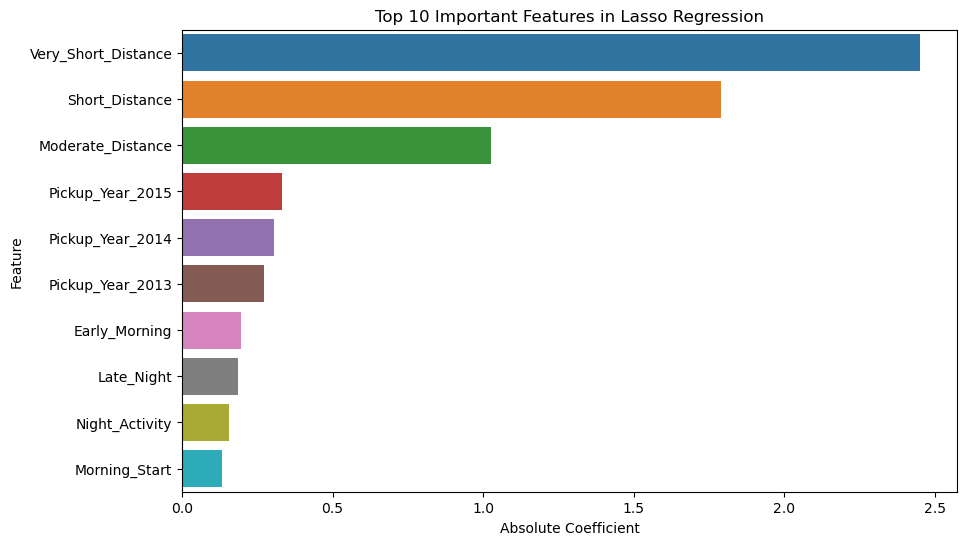

In [1152]:
# Plot the top 10 features (or fewer, depending on dataset size)
top_features = sorted_feature_importance.head(10)

# Set the figure size
plt.figure(figsize=(10, 6))

# Use Seaborn's barplot with a multi-color palette
sns.barplot(
    x="Absolute Coefficient",
    y="Feature",
    data=top_features,
    palette="tab10"  
)
# Add labels and a title
plt.xlabel('Absolute Coefficient')
plt.ylabel('Feature')
plt.title('Top 10 Important Features in Lasso Regression')

# Show the plot
plt.show()

### Analyze the impact of the sign of coefficients

In [1123]:
# Positive coefficients indicate a direct relationship, while negative coefficients suggest an inverse relationship.
pos_features = feature_importance_df[feature_importance_df['Coefficient'] > 0]
neg_features = feature_importance_df[feature_importance_df['Coefficient'] < 0]

print("\nFeatures with Positive Impact:")
print(pos_features.sort_values(by='Absolute Coefficient', ascending=False))

print("\nFeatures with Negative Impact:")
print(neg_features.sort_values(by='Absolute Coefficient', ascending=False))


Features with Positive Impact:
                Feature  Coefficient  Absolute Coefficient
5      Pickup_Year_2015     0.330575              0.330575
4      Pickup_Year_2014     0.305354              0.305354
3      Pickup_Year_2013     0.273108              0.273108
2      Pickup_Year_2012     0.091132              0.091132
29    dropoff_longitude     0.041408              0.041408
26     pickup_longitude     0.027451              0.027451
25      passenger_count     0.012299              0.012299
1      Pickup_Year_2011     0.005910              0.005910
12  Pickup_Day_Thursday     0.003686              0.003686

Features with Negative Impact:
                 Feature  Coefficient  Absolute Coefficient
24   Very_Short_Distance    -2.452277              2.452277
23        Short_Distance    -1.789768              1.789768
22     Moderate_Distance    -1.025934              1.025934
15         Early_Morning    -0.195413              0.195413
18            Late_Night    -0.184656         

## Interpretation of Feature Importance in the Context of Uber Taxi Fare Prediction:

#### Features with Negative Impact on Taxi Fare:
##### 1) Very_Short_Distance (Coefficient: -2.452277):

- The negative coefficient for very short distances has the highest absolute value, which suggests that very short trips significantly reduce the fare. This is in line with expectations, as short trips typically have lower fares due to the limited distance traveled.
#### 2) Short_Distance (Coefficient: -1.789768):

- Short distances also have a negative impact on the fare, although the effect is less pronounced than for very short distances. This supports the idea that shorter trips have lower fare amounts, but they are priced higher than the very short distances.
#### 3) Moderate_Distance (Coefficient: -1.025934):

- Moderate distances continue the trend, with a smaller negative coefficient compared to short and very short distances. This suggests that longer trips still have a negative impact on fare but are priced less aggressively than shorter trips.
#### 4) Early_Morning (Coefficient: -0.195413) & Late_Night (Coefficient: -0.184656):

- Both early morning and late night fares show negative coefficients, indicating that trips taken at these times are associated with lower fare amounts. This could be due to lower demand during these hours, or possibly fare discounts for off-peak hours.
#### 5) Night_Activity (Coefficient: -0.154222) & Morning_Start (Coefficient: -0.131079):

- These features reflect times when there is likely lower demand for taxis, resulting in negative fare coefficients. The "Night Activity" feature could be related to off-peak hours, while "Morning Start" could indicate early-morning trips which are typically less expensive.
#### 6) Pickup_Day_Sunday (Coefficient: -0.085216) & Pickup_Day_Monday (Coefficient: -0.065124):

- Trips on Sundays and Mondays seem to result in slightly lower fares, suggesting that these days might have lower demand, or that they reflect lower traffic periods for taxis. This could also be due to certain pricing policies that target specific days for discounts or offers.
#### 7) Evening_Drive (Coefficient: -0.077715):

- The negative coefficient for evening drives indicates that fares during the evening are lower, possibly reflecting lower traffic congestion or fare policies that cater to evening commuters.
#### 8) Dropoff_Latitude (Coefficient: -0.070529) & Pickup_Latitude (Coefficient: -0.021991):

- Both dropoff and pickup latitude indicate that specific locations have a lower fare, reflecting either a reduction in fare due to geographical location or possibly the reduced cost of traveling to those areas.
#### 9) Pickup_Month_Spring (Coefficient: -0.064832), Pickup_Month_Summer (Coefficient: -0.064279), Pickup_Month_Winter (Coefficient: -0.063620):

- The negative coefficients for these months indicate that fares are generally lower during the spring, summer, and winter months, possibly due to seasonal effects, demand patterns, or pricing strategies aimed at boosting off-peak travel.
#### 10) Pickup_Day_Saturday (Coefficient: -0.049874) & Pickup_Day_Wednesday (Coefficient: -0.001724):

- Lower fares on Saturdays and Wednesdays suggest that these days might either have lower demand, or taxis might be incentivizing travel during these periods with reduced pricing.


#### Features with Positive Impact on Taxi Fare:
##### 1) Pickup_Year_2015 (Coefficient: 0.330575):

- The positive coefficient for the year 2015 suggests that fares in this year were significantly higher compared to the base year (which could be the earliest year in the dataset). This could indicate increased pricing in 2015, likely due to inflation, economic shifts, or changes in pricing policies during that period.
##### 2) Pickup_Year_2014 (Coefficient: 0.305354):

- Similarly, fares in 2014 were also higher than the base year. The slightly smaller coefficient compared to 2015 suggests that 2014 saw a less sharp increase in fares, but it still had a positive impact on fare prices.
##### 3) Pickup_Year_2013 (Coefficient: 0.273108):

- The year 2013 also saw increased fares, though the impact is somewhat less pronounced than 2014 and 2015. This suggests a gradual increase in fares over the years.
##### 4) Pickup_Year_2012 (Coefficient: 0.091132):

- While fares in 2012 were higher than in the base year, the coefficient is smaller, indicating a less pronounced effect. This could reflect pricing strategies or economic factors that led to smaller fare hikes in this period.
##### 5) Dropoff_Longitude (Coefficient: 0.041408) & Pickup_Longitude (Coefficient: 0.027451):

- The positive coefficients for both dropoff and pickup longitude suggest that specific geographical locations are associated with higher fares. The impact is relatively small, but it still indicates that fares tend to be higher in certain longitudes, potentially reflecting demand, average income levels, or longer travel times in these areas.
##### 6) Passenger_Count (Coefficient: 0.012299):

- The positive coefficient for the passenger count indicates that more passengers are associated with a higher fare. This is intuitive, as taxis typically charge higher fares when there are more passengers, which could indicate a larger vehicle or a longer journey.
##### 7) Pickup_Year_2011 (Coefficient: 0.005910):

- he relatively small positive coefficient for 2011 suggests a marginal increase in fares compared to the base year, which could be influenced by minor adjustments in pricing policy or other factors in that year.
##### 8) Pickup_Day_Thursday (Coefficient: 0.003686):

- The small positive coefficient for Thursdays indicates a slight increase in fare prices on this day compared to others. This could reflect weekday-specific demand patterns, such as higher demand for taxis on Thursdays due to specific events or commuter behavior.


### Strategies to Boost Uber’s Revenue and Optimize Operations:

##### 1) Very Short and Short Distances:

- Adjust Minimum Fare: Increase the base fare for very short trips to ensure profitability for drivers and maintain operational efficiency.
Short-Trip Incentives: Launch special promotions or discounts for riders taking short trips to encourage more bookings and increase ride frequency in this category.
##### 2) Time-Based Strategies:

- Early Morning and Late Night: Offer discounted fares or limited-time promotions during early mornings and late nights to attract more riders during low-demand hours.
- Driver Incentives for Low-Demand Hours: Provide financial bonuses or surge pricing for drivers operating during early morning or late-night hours to improve availability and rider satisfaction.
##### 3. Geographic Factors:

- Region-Specific Fare Adjustments: Analyze underperforming regions and dynamically adjust pricing for pickup/drop-off in these areas. Use demand-supply patterns to optimize revenue and rider attraction.
- Zone-Based Discounts: Introduce targeted discounts for specific zones to drive more rides from areas with lower demand.
##### 4. Seasonal and Weekly Trends:

- Seasonal Promotions: Run campaigns with promotional offers during off-peak seasons or low-demand months to maintain ride volume.
- Day-Specific Discounts: Identify days with lower demand (e.g., midweek like Wednesdays or Sundays) and offer day-specific deals to boost ridership.
##### 5. Driver Incentives:

- Incentivize Short Trips: Provide drivers with extra bonuses or rewards for completing short-distance rides to reduce cancellations and improve service in this segment.
- Time-Specific Rewards: Offer time-based bonuses to encourage drivers to operate during early mornings or late nights when demand is typically low.
##### 6. Marketing and Customer Engagement:

- Personalized Marketing Campaigns: Use customer data to create targeted campaigns for specific demographics, encouraging them to book rides during off-peak hours or in less popular areas.
- Loyalty Programs: Introduce loyalty programs or discounted ride bundles for frequent riders to increase retention and long-term engagement.
#### Expected Outcomes:
- Increased Demand: By promoting rides during low-demand periods and regions, Uber can generate more revenue while maintaining steady ride volumes.
- Enhanced Driver Satisfaction: Providing driver incentives will encourage more availability during low-demand times and reduce ride cancellations.
- Improved Revenue: Strategic adjustments in fares, promotions, and incentives will result in optimized revenue across distances, times, and locations.
- Balanced Supply and Demand: With these measures, Uber can achieve better resource allocation and improve overall service quality for riders and drivers alike.
- These strategies will not only enhance Uber’s profitability but also contribute to higher rider satisfaction and driver engagement, creating a more sustainable business model.









# Innovative Strategies to Boost Uber’s Business and Profitability

#### 1) Subscription Model for Frequent Riders
##### Dynamic Tier Pricing: Offer different subscription tiers based on rider habits, such as short-distance commuters or night travelers.
#### 2) Gamified Discounts for Riders
##### Gamify Short and Off-Peak Rides: Implement a rewards system where riders earn points for choosing short trips, traveling during off-peak hours, or using less popular routes. Points can be redeemed for ride discounts or other perks.
#### 3) Corporate and Event Partnerships
##### Tie-ups with Local Businesses: Partner with hotels, malls, or event organizers to provide bundled offers (e.g., "Get 20% off your ride to/from XYZ Mall").
##### Corporate Commute Packages: Offer discounted packages to companies for employee transportation, especially during peak or low-demand hours to stabilize earnings.
#### 4) Eco-Friendly Fares
##### Launch a “Green Ride” Option: Allow riders to choose electric or hybrid vehicles for their trips. Offer discounted rates during low-demand hours to encourage sustainability.
#### 5) Driver Profitability Enhancement
##### Dynamic Profit Sharing: Offer drivers a higher percentage of profits during low-demand times or in underperforming areas to motivate them to stay active.
###### Flexible Driver Options: Allow part-time drivers to work only during their preferred hours (e.g., early mornings or late nights) without penalties to ensure coverage when needed.
#### 6) Personalized Offers with Predictive Analytics
##### AI-Driven Custom Promotions: Use predictive analytics to understand individual rider habits and send tailored offers. Examples:
##### For short-trip riders: “Get 20% off your next trip under 5 km!”
##### For night travelers: “₹50 off rides after 10 PM this weekend!”
##### This hyper-personalization can increase rider engagement and trip frequency.
#### 7) Incentives for Group Rides
##### Introduce Group Discounts: Provide discounts for riders booking as a group or carpooling. This helps maximize vehicle occupancy, reducing costs per trip for drivers and boosting overall revenue.
#### 8) Partnerships with Public Transport
##### First-Mile/Last-Mile Solutions: Partner with local public transport providers to offer discounts for rides to/from public transport hubs (e.g., railway stations, bus stops). This can help boost demand in low-performing areas.
#### 9) Surge Credit System
##### Earn and Redeem Surge Credits: Allow riders to earn “surge credits” for booking trips during non-surge hours, which they can redeem later during peak hours for discounted rides.
#### 10) Localized Marketing Campaigns
##### Use Regional Data for Targeted Campaigns: Analyze area-specific data to run localized marketing promotions. Examples:
##### In areas with frequent short-distance trips: Promote offers like “₹50 for 3 km rides.”
##### For night riders: Highlight safety and availability features in the app.
#### Conclusion:
##### By implementing these strategies, Uber can enhance profitability, differentiate itself from competitors, and improve customer and driver satisfaction.

# AI-Based Innovative Strategies to Boost Uber’s Business and Profitability:

#### 1)AI-Powered Ride Customization
##### Dynamic Mood-Based Rides:
- Allow riders to choose a "ride mood" (e.g., silent ride, music playlist, or informative audio sessions). AI can predict and suggest these preferences automatically.
##### Preferred Driver Match:
- Enable riders to mark favorite drivers, and when possible, Uber matches them, enhancing trust and comfort.
#### 2) Hyperlocal Service Expansion
##### Neighborhood Shuttle Services:
- Launch mini-shuttle vans in busy residential areas for short-distance commutes (like school pickups or market drops).
##### Specialty Rides:
- Pet-friendly rides for transporting animals.
- Healthcare rides optimized for hospital visits, with extra space for wheelchairs or stretchers.
#### 3) Driver Empowerment Hub
##### Driver Training Academy:
- Provide free workshops for drivers on soft skills, eco-driving techniques, and earning maximization tips to improve service quality and reduce operational costs.
##### Driver-to-Driver Lending Program:
- Create a peer-based lending system where experienced drivers can lend credits or funds to new drivers, facilitated through Uber.
#### 4) Multi-Modal Travel Pass
##### Integrated Travel Subscription:
- Partner with local bus, metro, and train services to create a single subscription pass that includes Uber rides for last-mile connectivity.
##### Seamless Travel Planner:
- Integrate a trip planner within the app that combines Uber rides with public transport schedules for the most cost-effective and time-efficient routes.
#### 5) Augmented Reality (AR) Assistance
##### Pick-up Spot Navigation:
- Use AR to guide riders to pick-up spots in crowded areas like malls or airports. Drivers can also use AR to locate riders faster.
#### In-Ride Experience:
- Offer interactive AR entertainment or information during the ride, such as virtual sightseeing tours for tourists.
#### 6) AI-Powered Personal Safety 
##### Real-Time Safety Monitoring:
- Implement AI-powered live safety monitoring systems to detect suspicious or unusual activity (e.g., drivers taking incorrect routes) during a ride and automatically alert the rider.
##### Voice-Activated Emergency Response:
- Introduce a voice-command feature where riders can alert emergency assistance without needing to interact with the app physically.
#### 7) Subscription Models for Different Audiences
##### Student Pass:
- Offer discounted subscription plans for students, providing limited monthly rides or special campus commute discounts.
##### Family Rides:
- Introduce a subscription that allows multiple family members to share discounts and collectively track rides.
#### 8) Eco-Credit Program
##### Carbon Offset Rewards:
- Introduce "eco-points" that riders and drivers earn for using green options like EVs or carpools. These points can be redeemed for ride discounts or donated to environmental causes.
##### EV Driver Bonus:
- Offer monetary bonuses or reduced platform fees for EV drivers achieving mileage goals.
#### 9) Real-Time Price Lock
##### Pre-Schedule Fare Lock:
- Let riders lock in a fixed fare up to 24 hours in advance to avoid surge pricing.
##### Fare Protection for Frequent Riders:
- Offer surge price waivers for loyal users during limited times.
#### 10) On-the-Go Commerce
##### In-Ride Shopping:
- Partner with brands to let riders browse and order items during their ride (e.g., groceries, fast food, or gift items) to be delivered by the driver upon arrival.
##### Driver Storefront:
- Allow drivers to sell small items like snacks or water bottles during rides for extra income.
#### 11) Localized Experiments
##### Regional Festivals & Events Tie-ups:
- Provide bundled ride offers and exclusive discounts during local festivals (e.g., flat fares to/from the fairground).
##### Cultural Add-ons:
- Add local touches to rides, such as regional music or personalized greetings in the local language.
#### 12) Time-Based Innovation
##### Rides by Subscription Periods:
- Launch short-term ride plans like “Weekend Pass” or “Workweek Commute Plan” for riders needing limited trips over specific days.
#### 13) Crowdsourced Ride Options
##### Community Carpooling:
- Allow communities or residential societies to set up carpools directly through Uber, reducing costs and increasing vehicle occupancy.
##### Flexible Shared Routes:
- Introduce shared Ubers for multiple riders on custom routes, such as college commutes for students with similar schedules.
#### 14) Service in Underserved Areas
##### Rural Outreach:
- Expand into rural areas by offering cost-effective shared services or smaller vehicles.
##### Customized Rural Partnerships:
- Partner with local organizations to integrate Uber rides into rural logistics, such as transporting agricultural goods or offering medical trips.
#### 15) AI-Powered Driver Health Monitoring (New Idea)
##### Real-Time Health Tracking:
- Use AI and IoT devices to monitor drivers’ health during trips. For instance, if fatigue or health issues are detected, the system could suggest rest breaks or assistance.
##### Driver Wellness Incentives:
- Provide bonuses or rewards for drivers adopting healthy habits, such as maintaining proper rest schedules or engaging in fitness activities.
### Conclusion
#### New AI-driven innovations like Real-Time Safety Monitoring and Driver Health Monitoring can be game-changers for Uber. They not only enhance rider and driver safety but also improve trust, engagement, and overall brand value.